## draw trees

In [4]:
source('drawtrees.R')    
library("plyr") 
library("phytools")
theme_update(plot.title = element_text(hjust = 0.5))

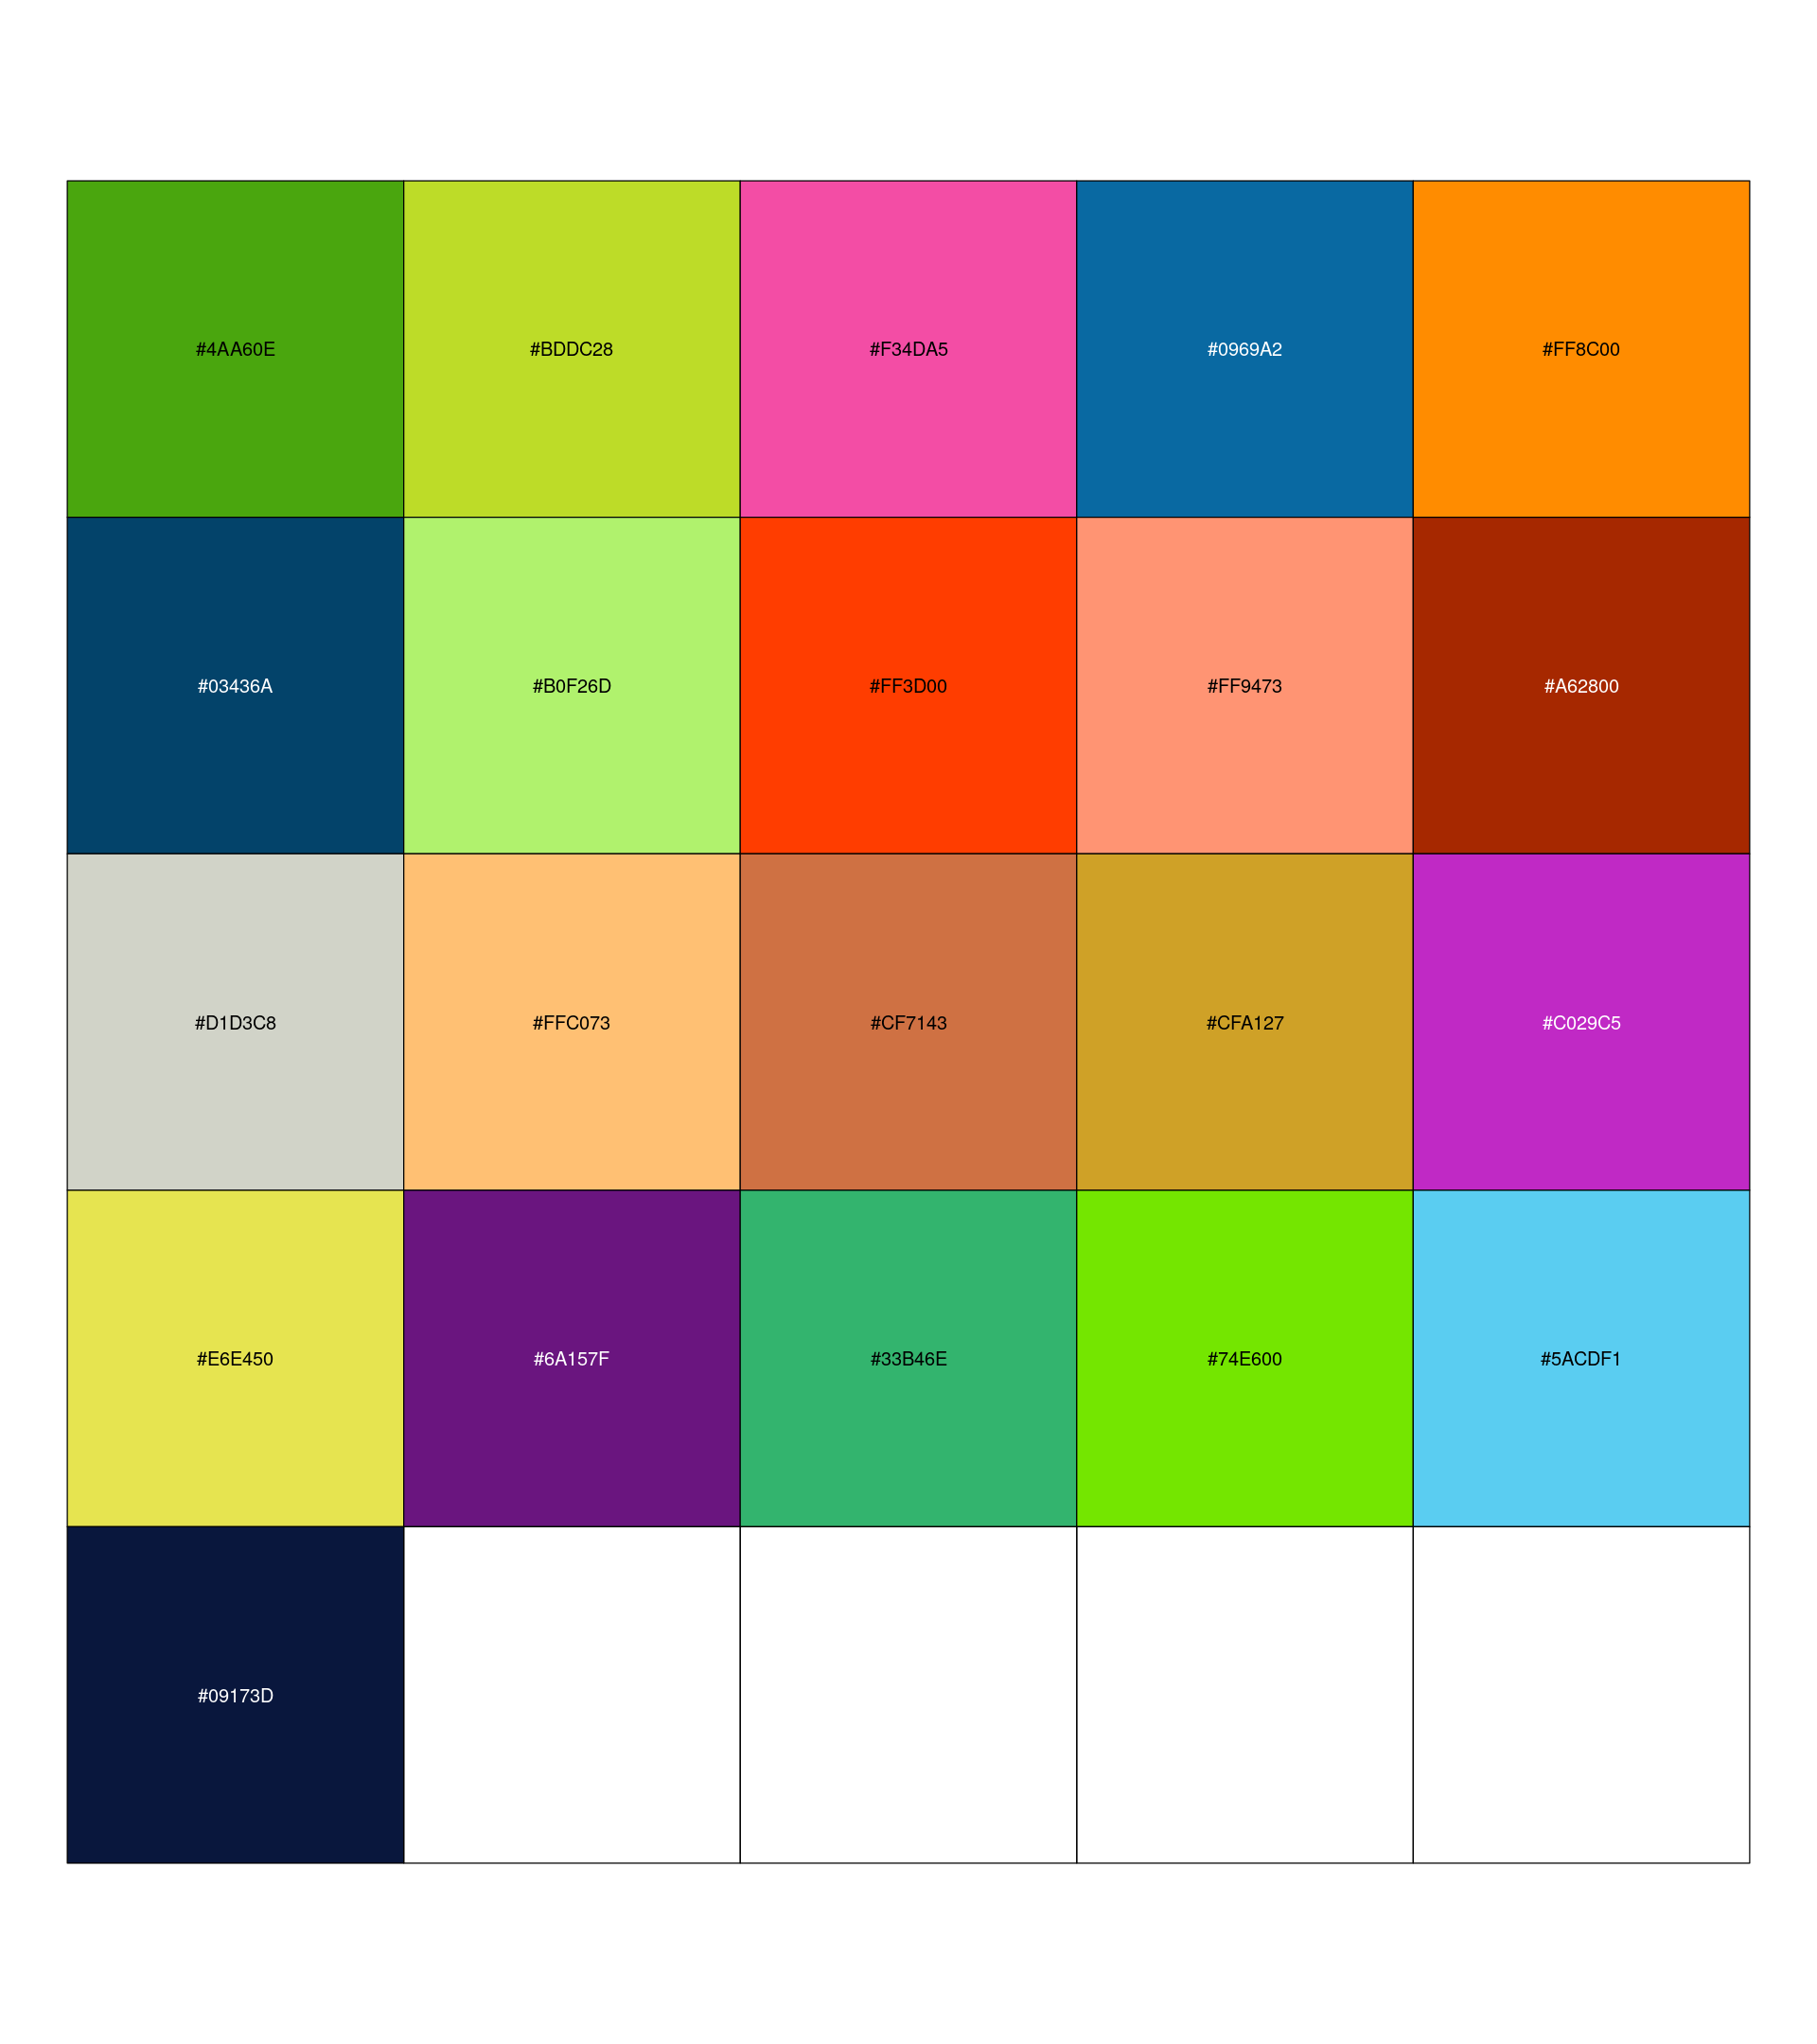

In [6]:
mycolors <- c(
  'Ireland'= "#4AA60E",
  'Scotland'= "#BDDC28",
  'Germany' = "#F34DA5",
  'Finland' = "#0969A2",
  'Poland' = "#FF8C00",
  'Netherlands' = "#03436A",
  'Lithuania' = "#B0F26D",  
  'New Zealand' = "#FF3D00",
  'Canada' = "#FF9473",
  'France' = "#A62800",
  'Russia' = "#D1D3C8",
  'Ethiopia' = "#FFC073",
  'Australia' = "#CF7143",
  'Israel' = "#CFA127",
  'Denmark'= "#C029C5",
  'Sweden'="#E6E450",
  'Belgium'="#6A157F",
  'Spain'="#33B46E",
  'China'="#74E600",
  'USA' = "#5ACDF1",
  'Europe'="#09173D" )

library(scales)
show_col(mycolors)

In [8]:
gmeta <- read.csv('global_meta.csv',row.names=1)
gmeta[] <- lapply(gmeta, as.character)
gmeta$ST <- as.character(gmeta$ST)

In [5]:
setwd('/other/catherine')
meta <- read.table('metadata_all.csv',sep=',',
                      header=TRUE,row.names=1)
#meta[] <- lapply(meta, as.character)
tree <- read.tree('results/tree.newick')
tree <- drop.tip(tree, c('pure'))
#tree <- root(tree,'ref')
#tree <- drop.tip(tree, c('ref'))

In [ ]:
options(repr.plot.width=15, repr.plot.height=9) 
tree2 <- read.tree('results/newtree/tree.newick')
#tree2 <- drop.tip(tree2, c('ref','pure'))
tree2 <- root(tree2,'ref')
p <- ggplottree(tree2, gmeta, layout='rect', colors=mycolors, cols=c('country','ST'), 
           cmaps=c('Set1','Set2'), tipsize=5, tiplabel=TRUE,tiplabelsize=4,#tiplabelcol='strain',
                offset=3000, tipoffset=1000, align=TRUE)#+ xlim(NA, 2500)
p

In [ ]:
options(repr.plot.width=15, repr.plot.height=9) 
p <- ggplottree(tree, gmeta, layout='rect', colors=mycolors, cols=c('country','ST'), 
           cmaps=c('Set1','Set2'), tipsize=5, tiplabel=TRUE,tiplabelsize=4,#tiplabelcol='strain',
                offset=3000, tipoffset=1000, align=TRUE)#+ xlim(NA, 2500)
p

In [580]:
#mrca <- findMRCA(tree, c('245','SRR12674172'))
mrca <- findMRCA(tree, c('223','SRR10958113'))
tr <- extract.clade(tree,mrca)
mrca

[1] 50

In [ ]:
ggtree(tree) + geom_text(aes(label=node), hjust=-.3) + geom_tiplab(align=TRUE)

In [ ]:
#mrca <- findMRCA(tree2, c('223','245'))
mrca <- findMRCA(tree2, c('227','245'))
#tr <- extract.clade(tree2,mrca)

options(repr.plot.width=10, repr.plot.height=5)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=5, tiplabel=TRUE,tipoffset=1, tiplabelcol='strain')
#p +  geom_text(aes(label=node), hjust=-.3) 
#p<- collapse(p,66)
p

## New Zealand

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


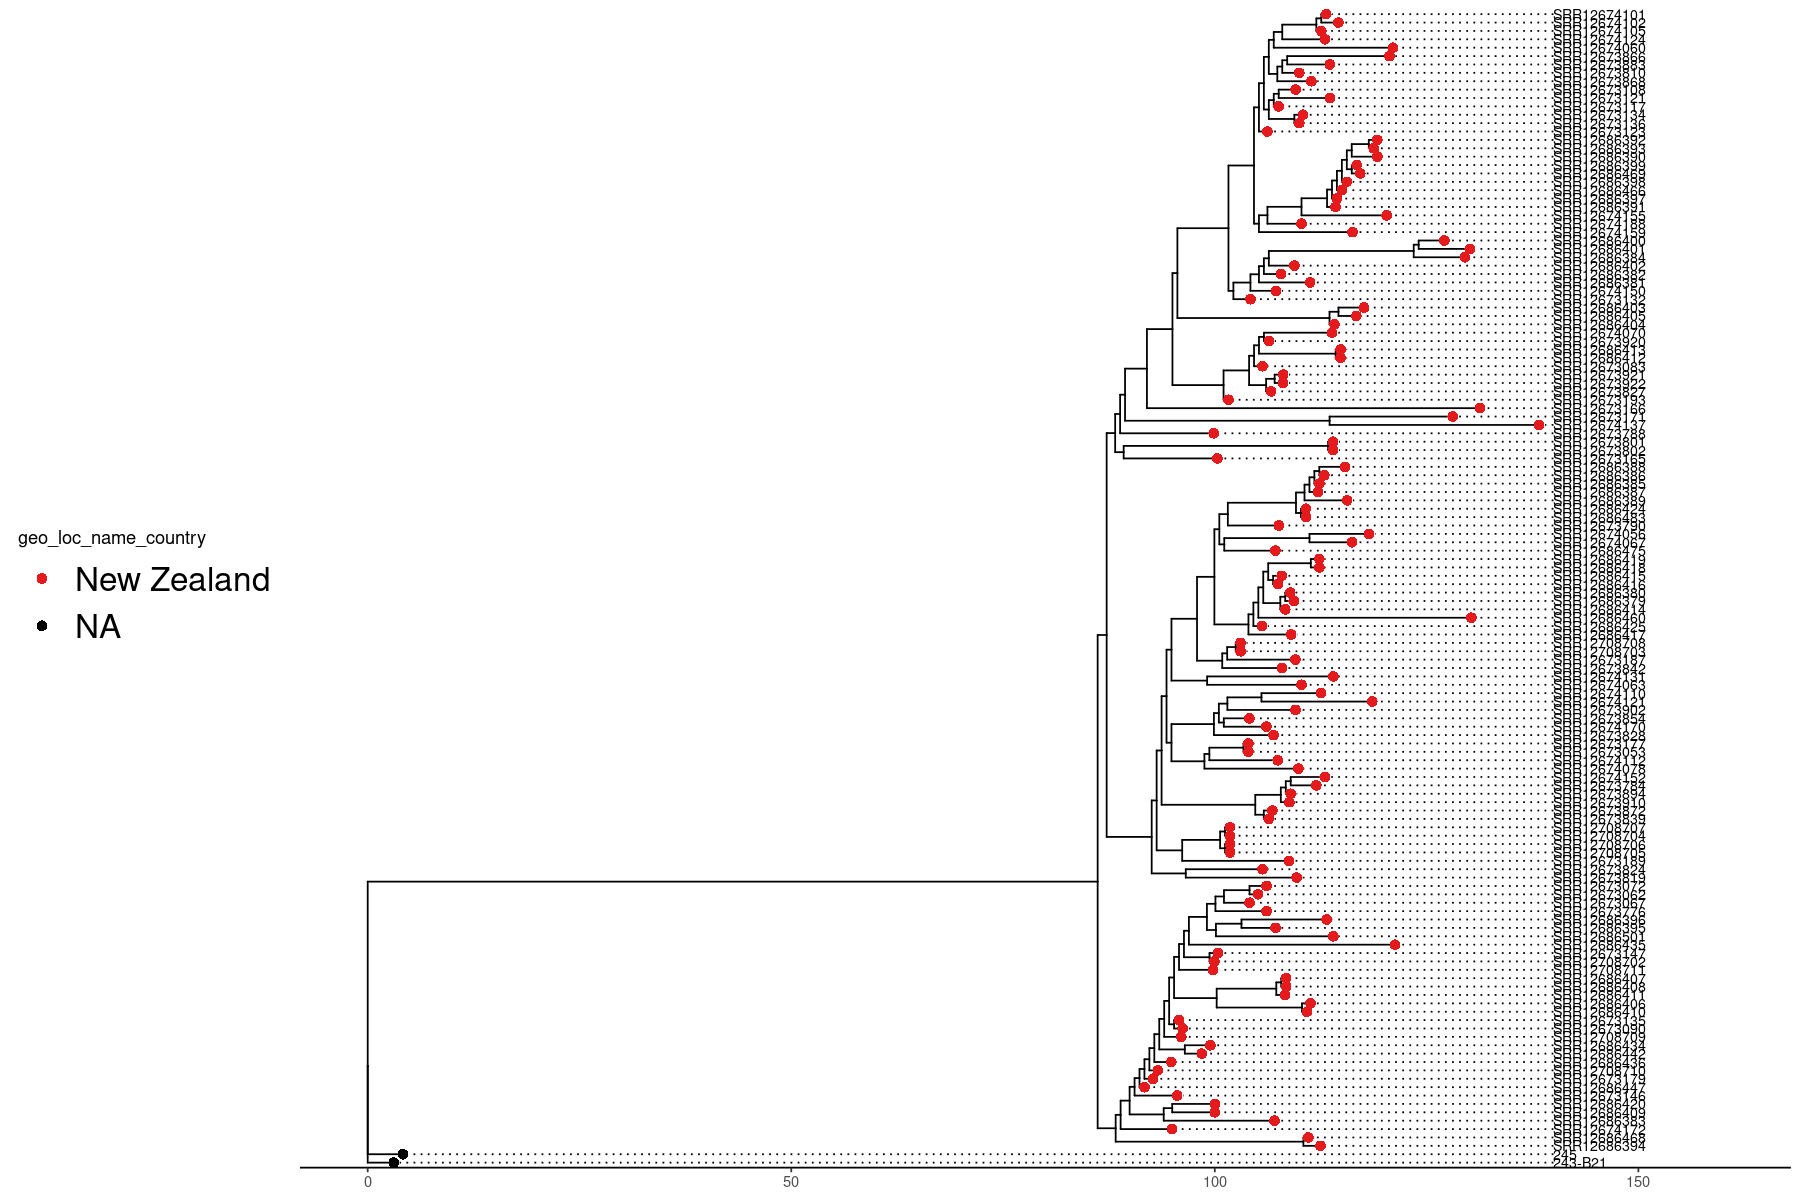

In [36]:
nzmeta <- read.table('PRJNA664415_runTable.csv',sep=',',header=TRUE,row.names=1)
#nztree <- read.tree('NZ_results/tree.newick')
nztree <- read.tree('panaroo_NZ/tree.newick')

nztree <- root(nztree,'245')
options(repr.plot.width=15, repr.plot.height=10)
ggplottree(nztree, nzmeta, layout='rect', cols=c('geo_loc_name_country'),
           cmaps=c('Set1'),tipsize=3, tiplabel=TRUE,tiplabelsize=3,tipoffset=1,align=TRUE)+ xlim(NA,160)

## panaroo core alignment

In [17]:
options(repr.plot.width=18, repr.plot.height=12)
ctree <- read.tree('panaroo_global/RAxML_bipartitions.variants')
ctree <- root(ctree,'NC_009497')
ctree<-drop.tip(ctree,'NC_009497')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning

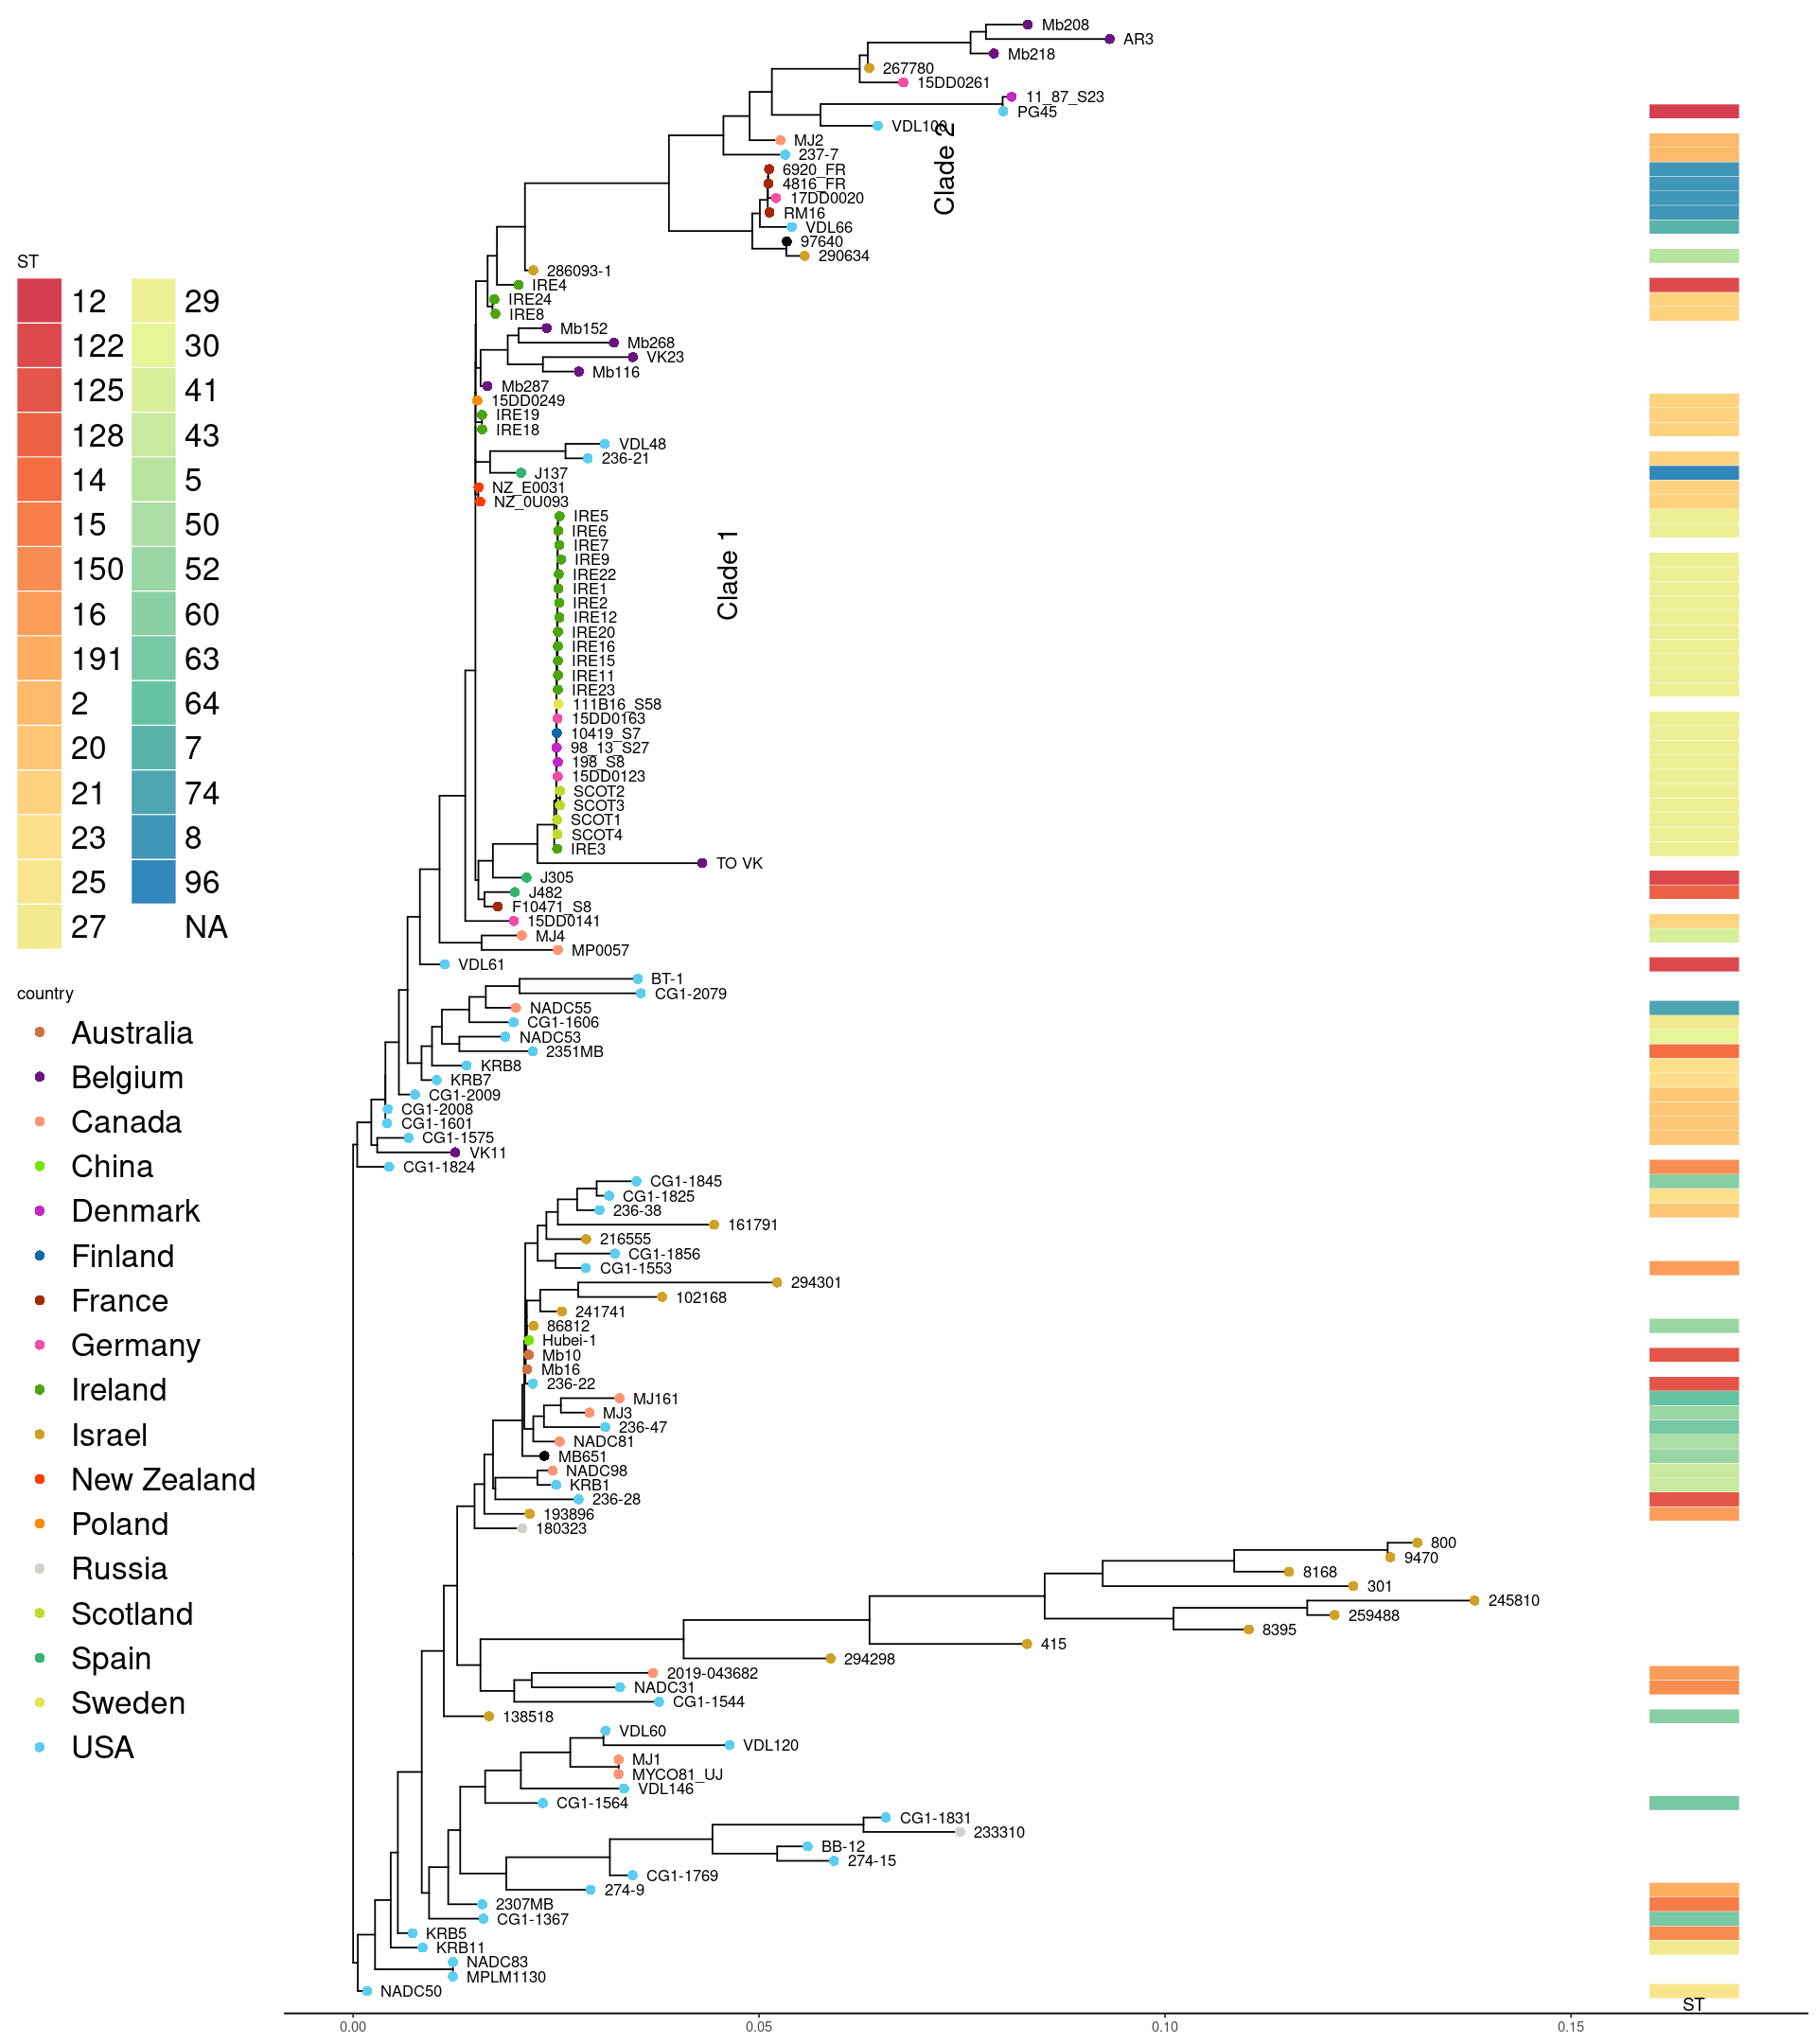

In [26]:
options(repr.plot.width=16, repr.plot.height=18)
#tr<-drop.tip(ctree,'NC_009497')
p <- ggplottree(ctree, gmeta, layout="rect", colors=mycolors,
           cols=c('country','ST'), cmaps=c('Set1','Spectral'), tiplabel=TRUE, tiplabelcol='strain',
           tipsize=3,offset=.008,tipoffset=.001,tiplabelsize=3.5)

p <- p + 
  geom_cladelabel(getMRCA(tr,c('224','228')), "Clade 1", offset=.01, barsize=3, angle=90, offset.text=.01, hjust=0.5, fontsize=6)
p <- p + 
  geom_cladelabel(getMRCA(tr,c('245','227','SRR12686435')), "Clade 2", offset=.01, barsize=2, angle=90, offset.text=.01, hjust=0.5, fontsize=6)
p #+ geom_text(aes(label=node), hjust=-.3)
#ggsave(filename = "global_tree.pdf" , device="pdf", width=12, height=18 , units="in" , limitsize=FALSE)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning

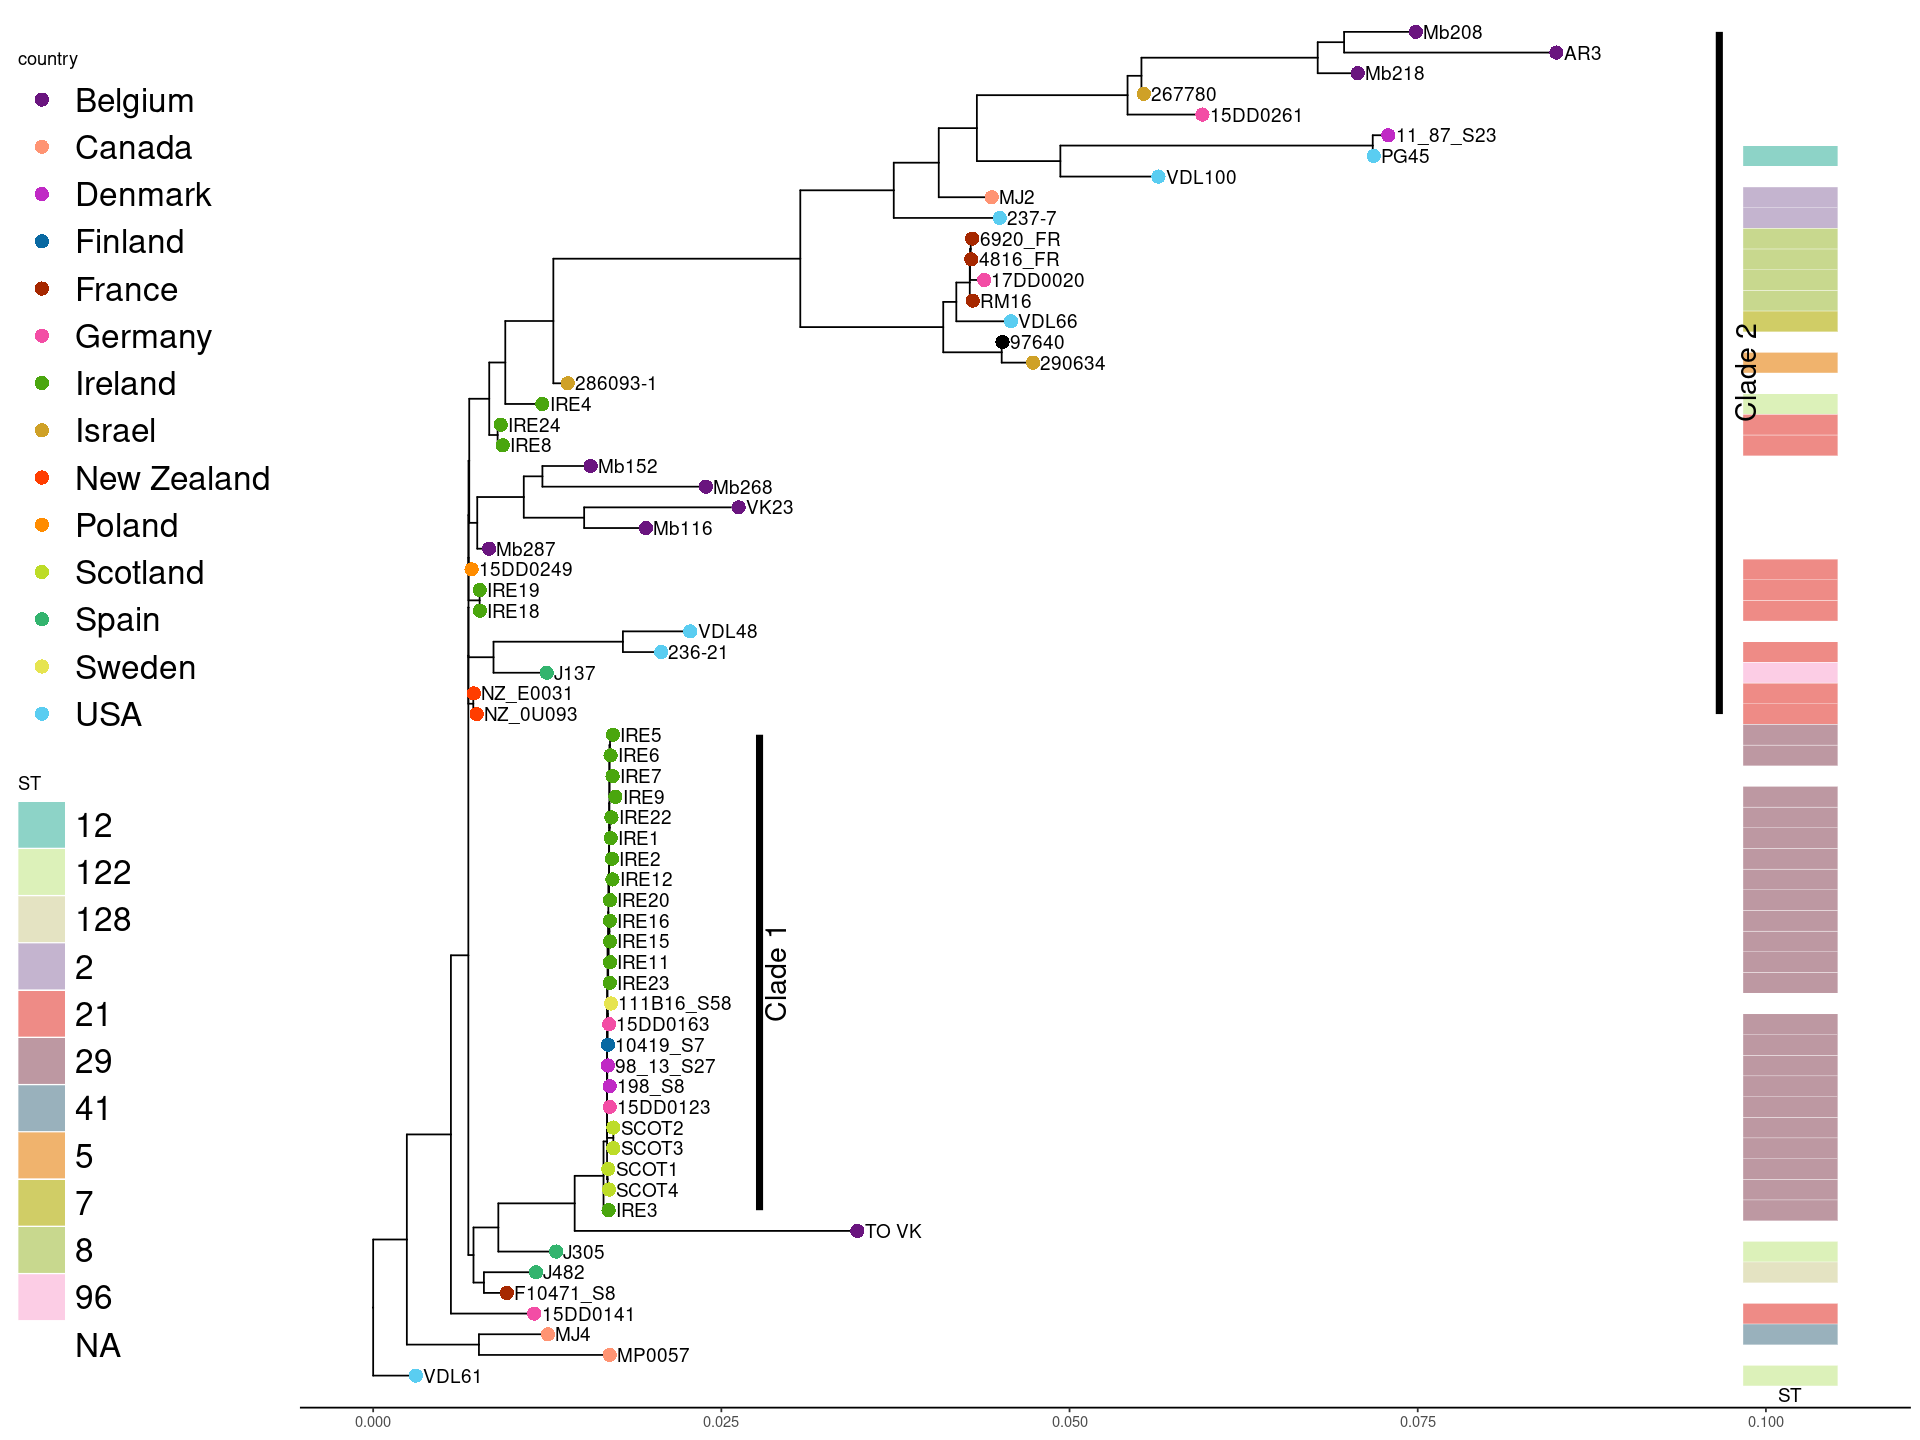

In [19]:
tr<-extract.clade(ctree, 202)
options(repr.plot.width=16, repr.plot.height=12)
p<- ggplottree(tr, gmeta, layout='rect',  colors=mycolors, cols=c('country','ST'), cmaps=c('Set1','Set3'),
          tipsize=4, tiplabel=TRUE,tiplabelsize=4,tipoffset=.0001,offset=.005,tiplabelcol='strain')

p <- p + 
  geom_cladelabel(getMRCA(tr,c('224','228')), "Clade 1", offset=.01, barsize=2, angle=90, offset.text=.001, hjust=0.5, fontsize=6)
p <- p + 
  geom_cladelabel(getMRCA(tr,c('245','227','SRR12686435')), "Clade 2", offset=.01, barsize=2, angle=90, offset.text=.001, hjust=0.5, fontsize=6)
p# + geom_text(aes(label=node), hjust=-.3)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 17 rows containing missing values or values outside the scale range (`geom_point_g_gtree()`).”


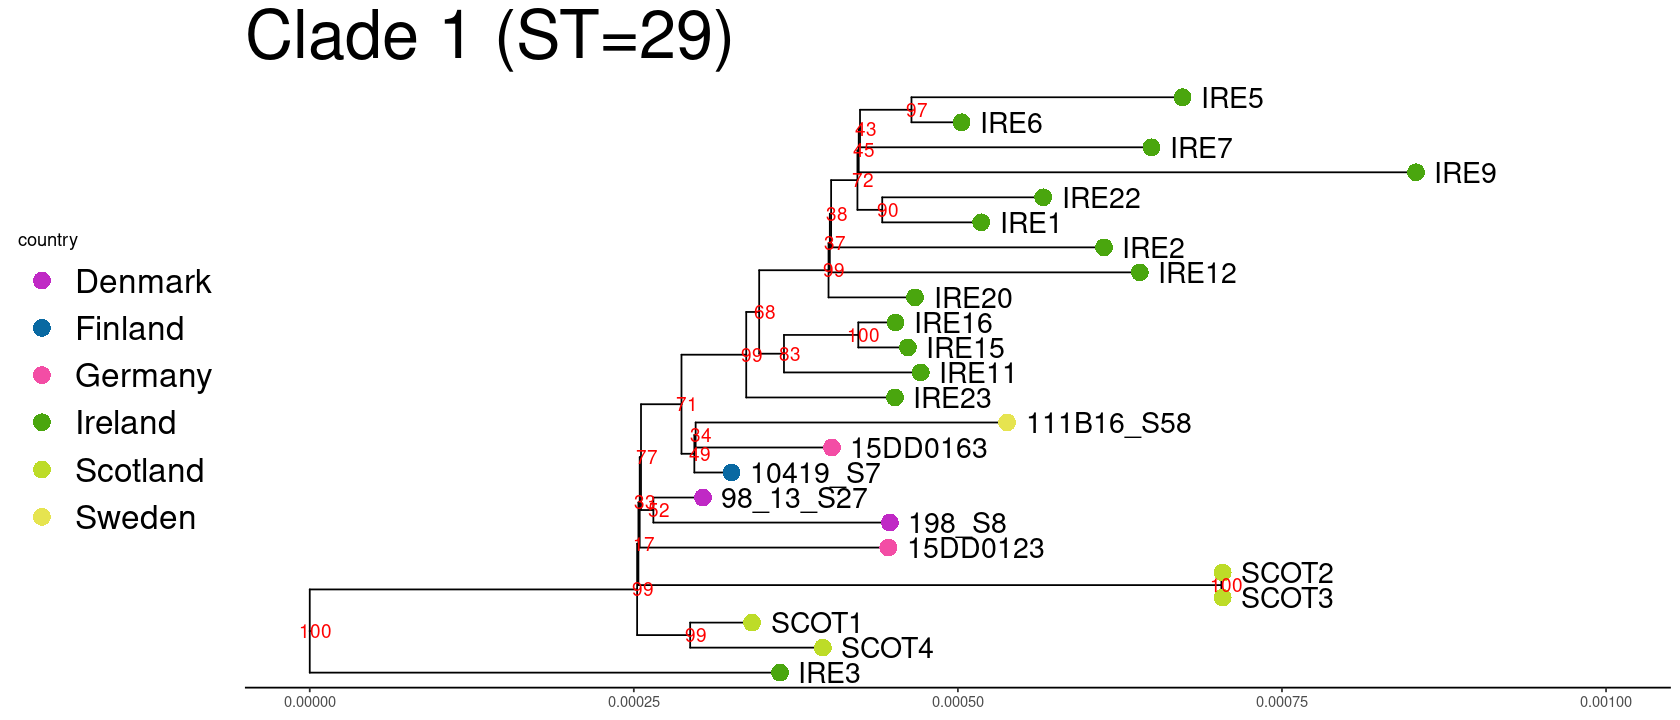

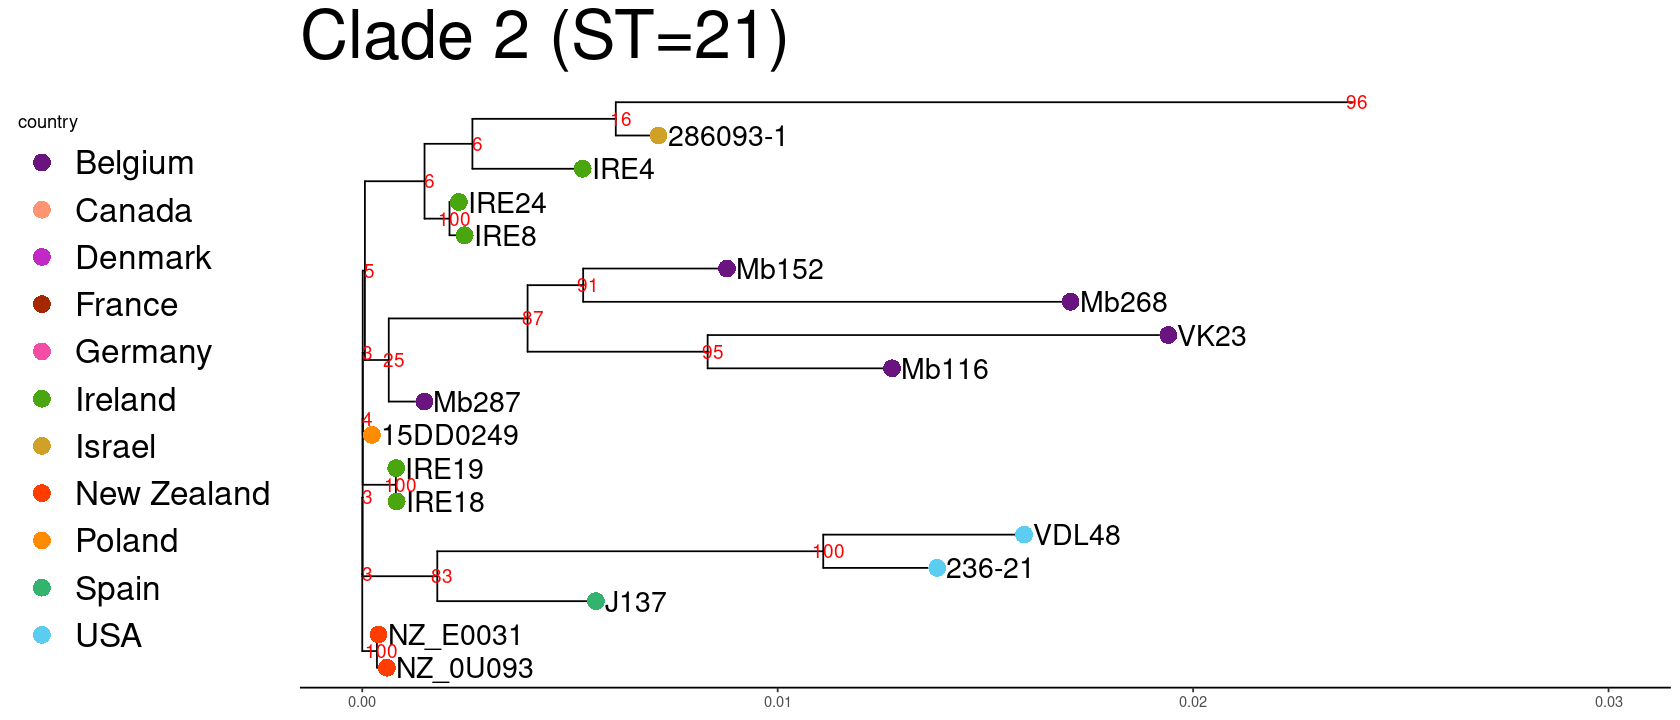

In [14]:
options(repr.plot.width=14, repr.plot.height=6)
mrca <- findMRCA(ctree, c('224','SCOT1'))
tr <- extract.clade(ctree,mrca)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=5, tiplabel=TRUE,tiplabelsize=6,tipoffset=1e-5, tiplabelcol='strain')+ xlim(NA, 0.001)
p+geom_nodelab(size = 4, color= "red")+ggtitle('Clade 1 (ST=29)')

options(repr.plot.width=14, repr.plot.height=6)
mrca <- findMRCA(ctree, c('241','245','SRR12686435'))
tr <- extract.clade(ctree,mrca)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=5, tiplabel=TRUE,tiplabelsize=6,tipoffset=1e-4, tiplabelcol='strain')+ xlim(NA, 0.03)
p<- collapse(p,45)
p+geom_nodelab(size = 4, color= "red")+ggtitle('Clade 2 (ST=21)') 

#p + geom_text(aes(label=node), hjust=-.3)


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


ERROR: Error in eval(expr, envir, enclos): object 'c1tree' not found


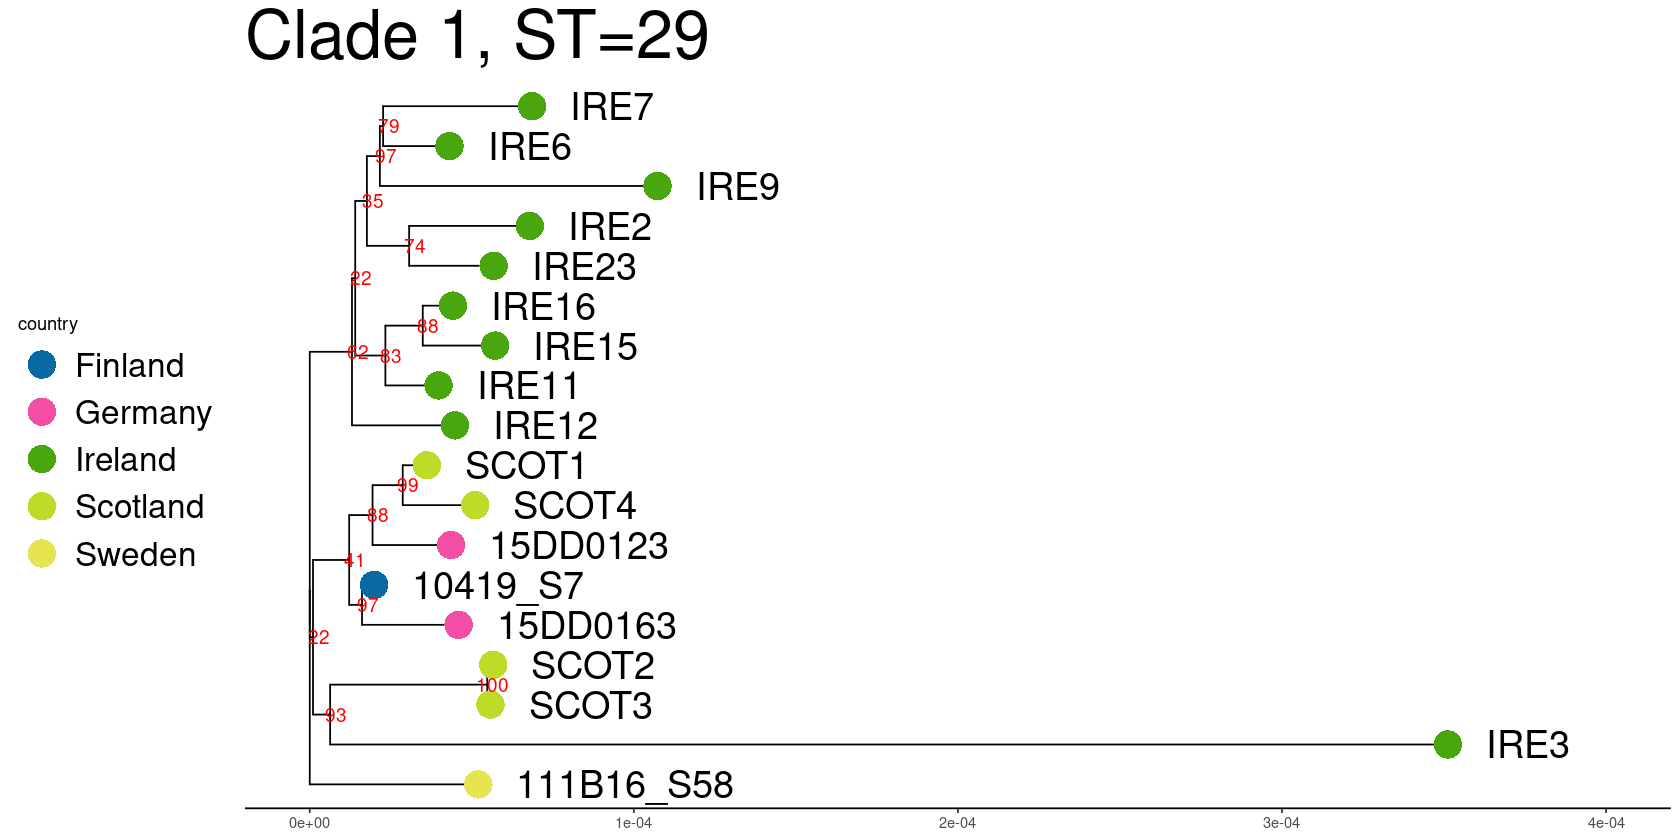

In [121]:
#clade 1
options(repr.plot.width=14, repr.plot.height=7)
c2tree<-read.tree('panaroo_clade1/RAxML_bipartitions.variants')
p <- ggplottree(c2tree, gmeta, layout="rect", colors=mycolors,cols=c('country'), 
                tiplabelsize=8,tipoffset=.00001,tipsize=8,tiplabel=TRUE,tiplabelcol='strain')+ xlim(NA, 0.0004)
p+geom_nodelab(size = 4, color= "red", hoffset=.1) + ggtitle('Clade 1, ST=29')


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


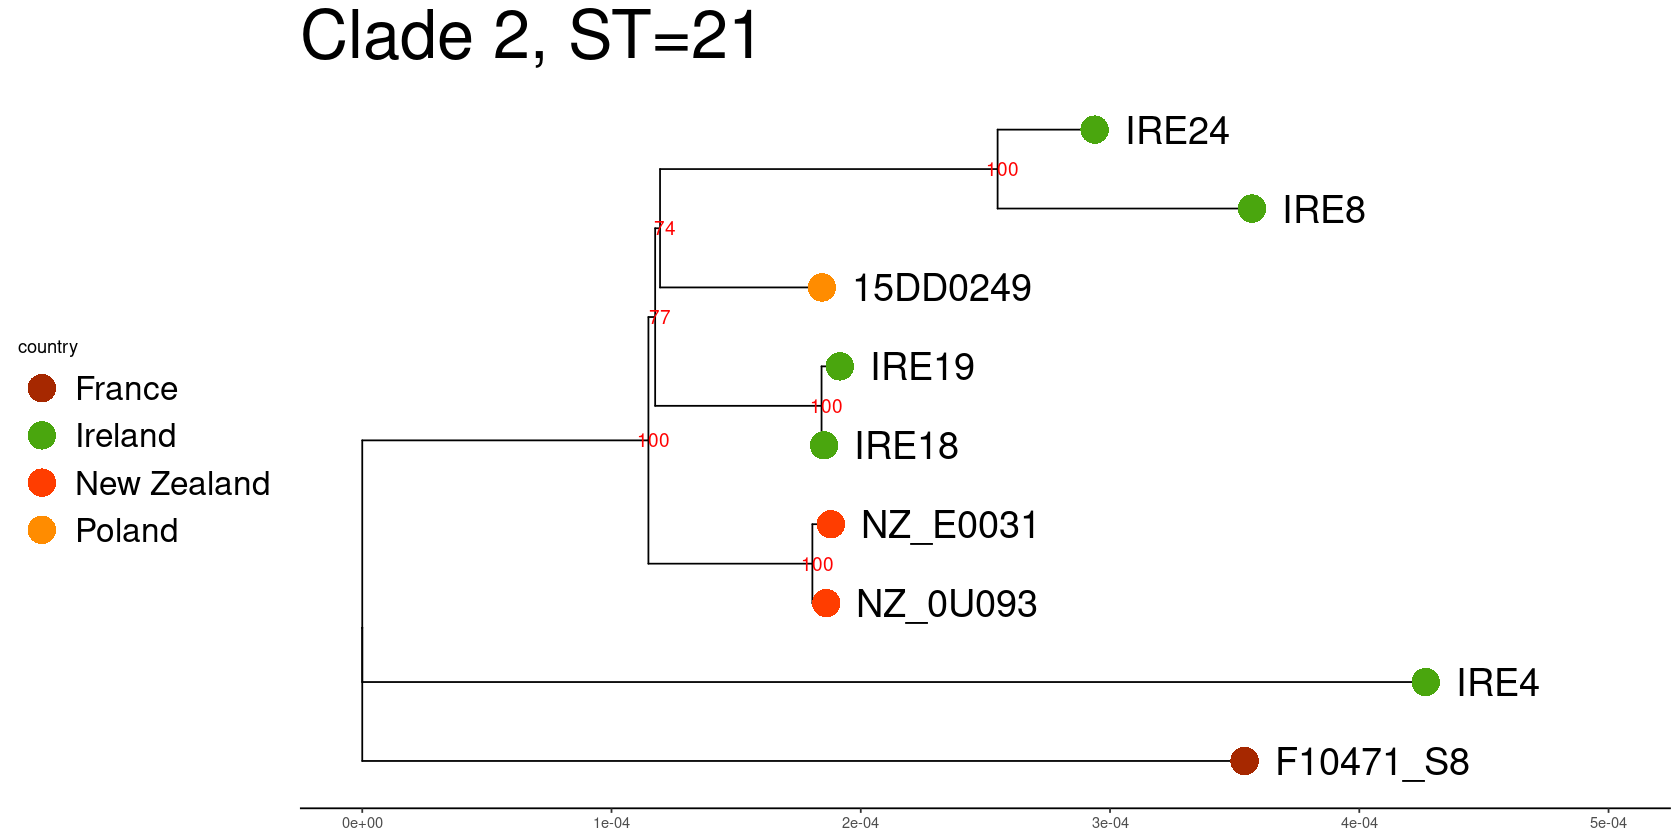

In [464]:
#clade 2
options(repr.plot.width=14, repr.plot.height=7)
c2tree<-read.tree('panaroo_clade2/RAxML_bipartitions.variants')
p <- ggplottree(c2tree, gmeta, layout="rect", colors=mycolors,cols=c('country'), 
                tiplabelsize=8,tipoffset=.00001,tipsize=8,tiplabel=TRUE,tiplabelcol='strain')+ xlim(NA, .0005)
p+geom_nodelab(size = 4, color= "red")+ ggtitle('Clade 2, ST=21')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


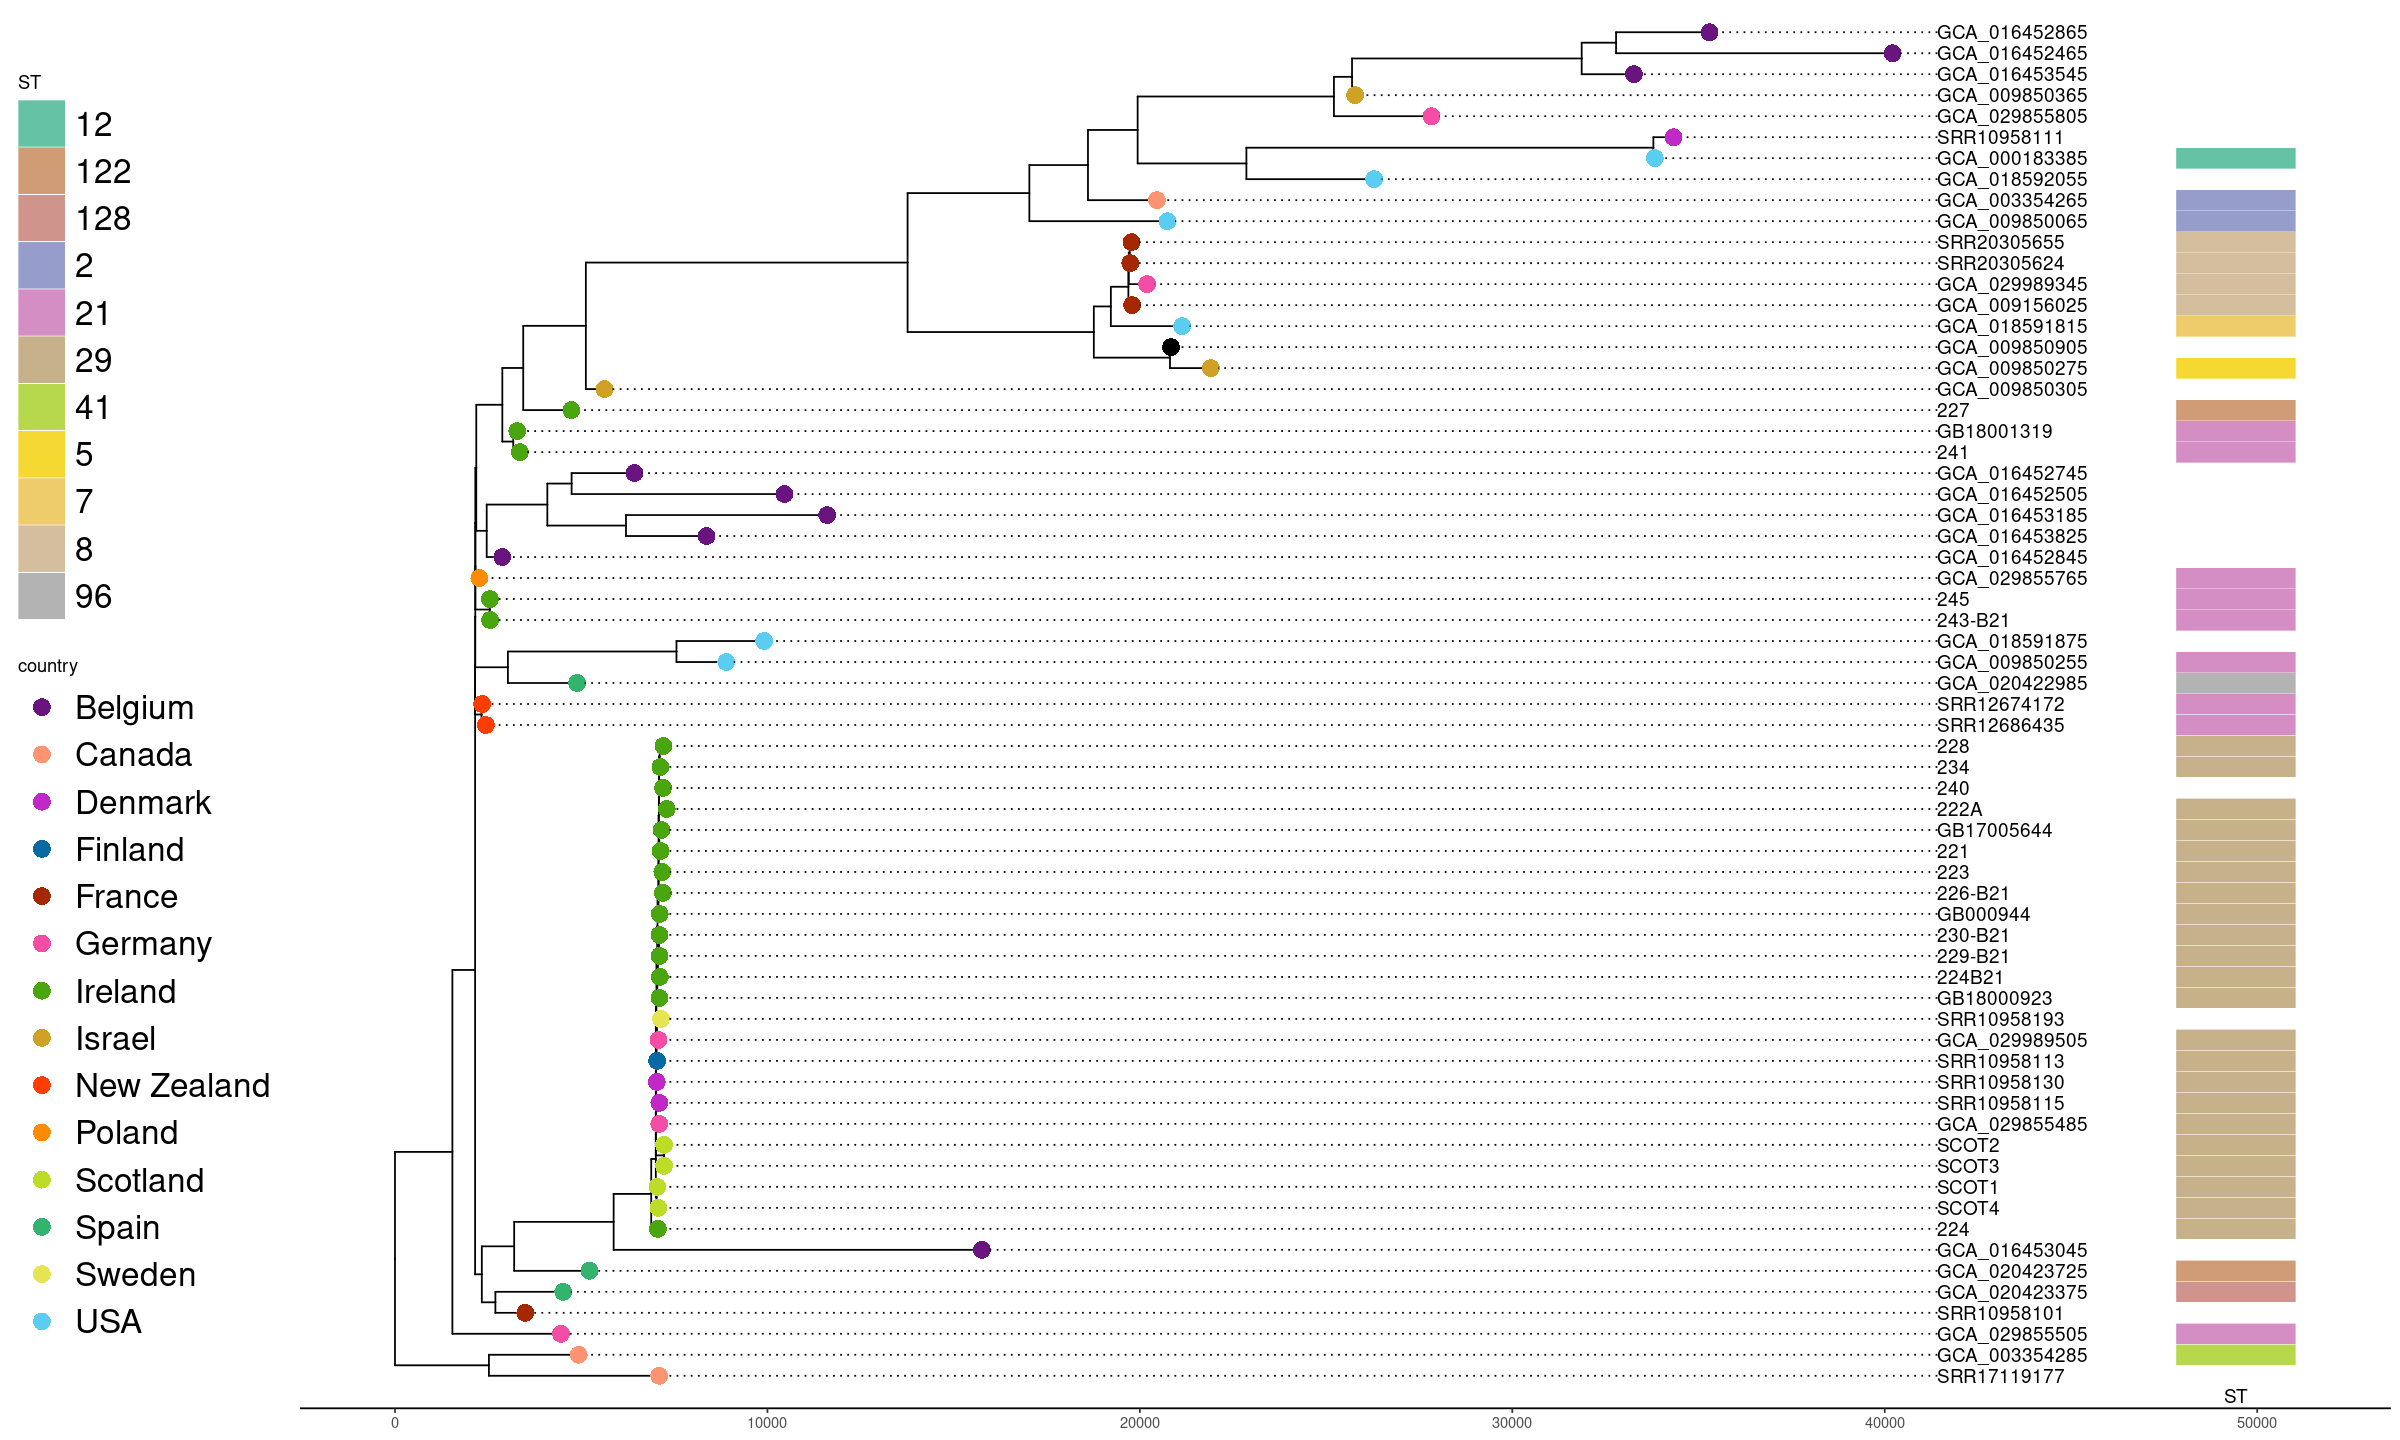

In [118]:
ctree2 <- read.tree('panaroo_global/tree.newick')
ctree2<-drop.tip(ctree2,'NC_009497')
tr<-extract.clade(ctree2, 202)
p <- ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country','ST'), 
           cmaps=c('Set1','Set2'), tipsize=5, tiplabel=TRUE,tiplabelsize=4,#tiplabelcol='strain',
                offset=3000, tipoffset=1000, align=TRUE)#+ xlim(NA, 2500)
p

## kSNP trees

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
#gtree <- read.tree('ksnp_entrez/tree.core_SNPs.parsimony.tre')
gtree <- read.tree('ksnp_entrez/tree.parsimony.tre')
gtree <- drop.tip(gtree,'GCA_005061465')
p<-ggplottree(gtree, gmeta, layout='rect', cols=c('country'), cmaps=c('Set1','Blues'), colors=mycolors,tipsize=2,offset=.1) #+ xlim(NA, 100)
p <- collapse(p,751)
p

## non-redundant global tree

In [388]:
ktree <- read.tree('ksnp_reduced/tree.parsimony.tre')
#ktree <- read.tree('ksnp_reduced/tree.core_SNPs.parsimony.tre')
#ktree <- read.tree('ksnp_reduced/tree.newick')
#ktree <- root(ktree,'GCA_000183385')
ktree <- root(ktree,'NC_009497')
rescaled_tree <- ladderize(ktree)  
ktree$edge.length[rescaled_tree$edge.length > .1] <- .1

## node support?

In [15]:
options(repr.plot.width=20, repr.plot.height=12)
ggtree(ctree2, layout='rect') + geom_text(aes(label=node), hjust=-.3) + geom_tiplab(align=TRUE)

ERROR: Error in eval(expr, envir, enclos): object 'ctree2' not found


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


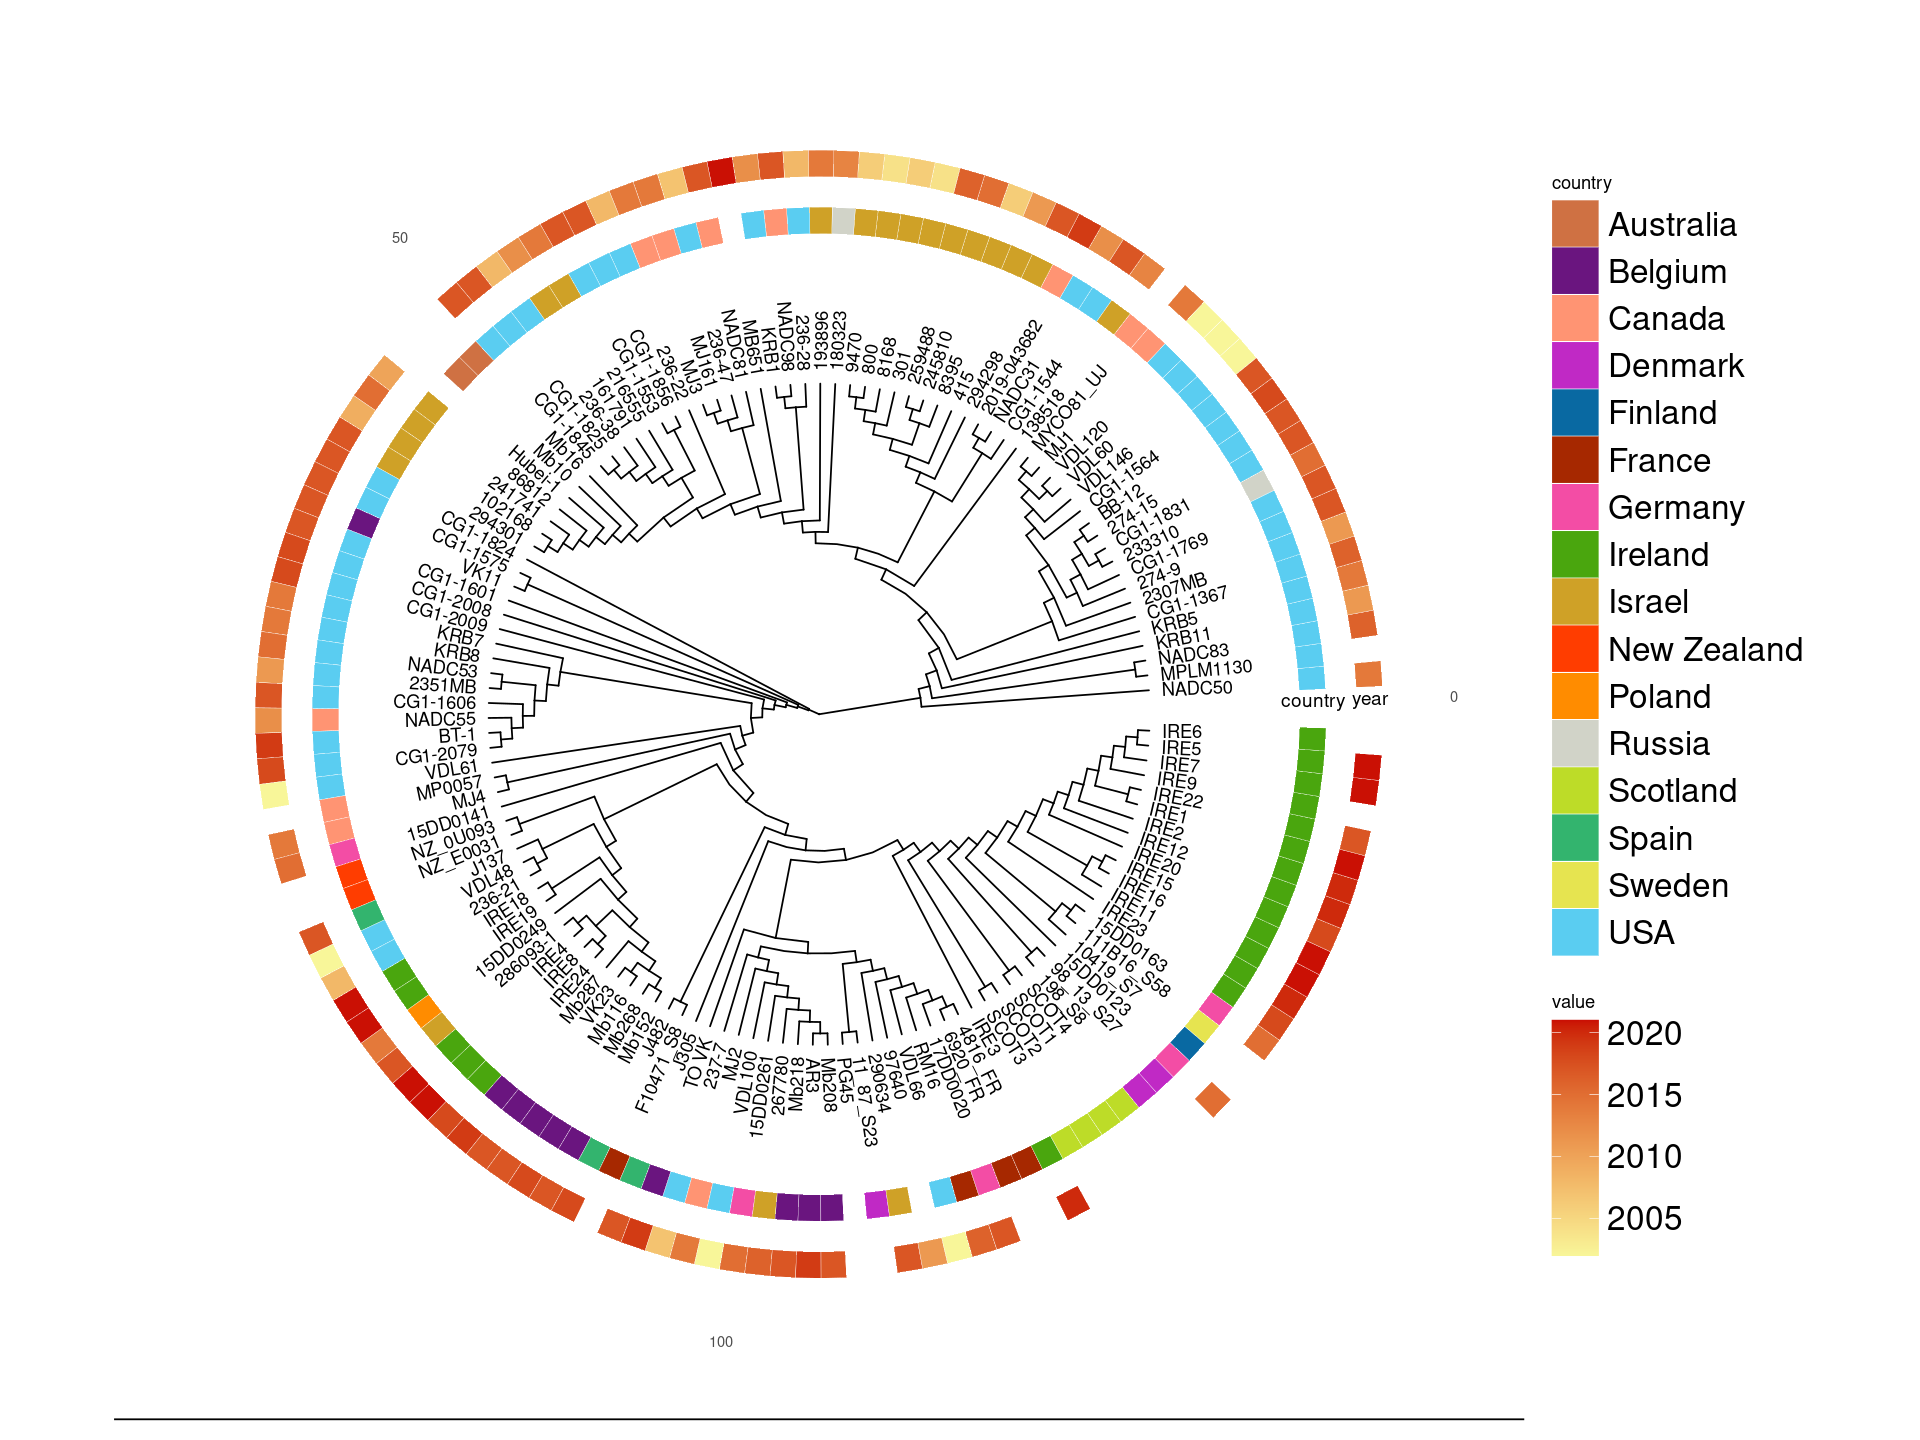

In [475]:
options(repr.plot.width=16, repr.plot.height=12)
tree <- ctree
tr <- gettreedata(tree, gmeta)
col <- 'country'
df <- gmeta[tree$tip.label,][col]

p <- ggtree(tr, layout = 'circular', branch.length='none') + geom_tiplab(aes(label=.data[['strain']]),offset=1) 
#p <- collapse(p, node=155)
p <- gheatmap(p, df, offset=12, width=.08, colnames_angle=0, colnames_offset_y = .05) +
        scale_fill_manual(values=mycolors, name=col, na.value="white") 

col2 = 'year'
df <- gmeta[tree$tip.label,][col2]
#df[] <- lapply(df, as.integer)
#print (df)
p <- p + new_scale_fill()
p <- gheatmap(p, df, offset=17, width=.08, colnames_angle=0, colnames_offset_y = .05) + 
        #scale_fill_viridis_c(option="A", name="continuous\nvalue")      
        scale_fill_gradient(low='#F8F699',high='#CA1004', na.value="white")

p <- p + theme_tree2(legend.text = element_text(size=20), legend.key.size = unit(1, 'cm'))
p

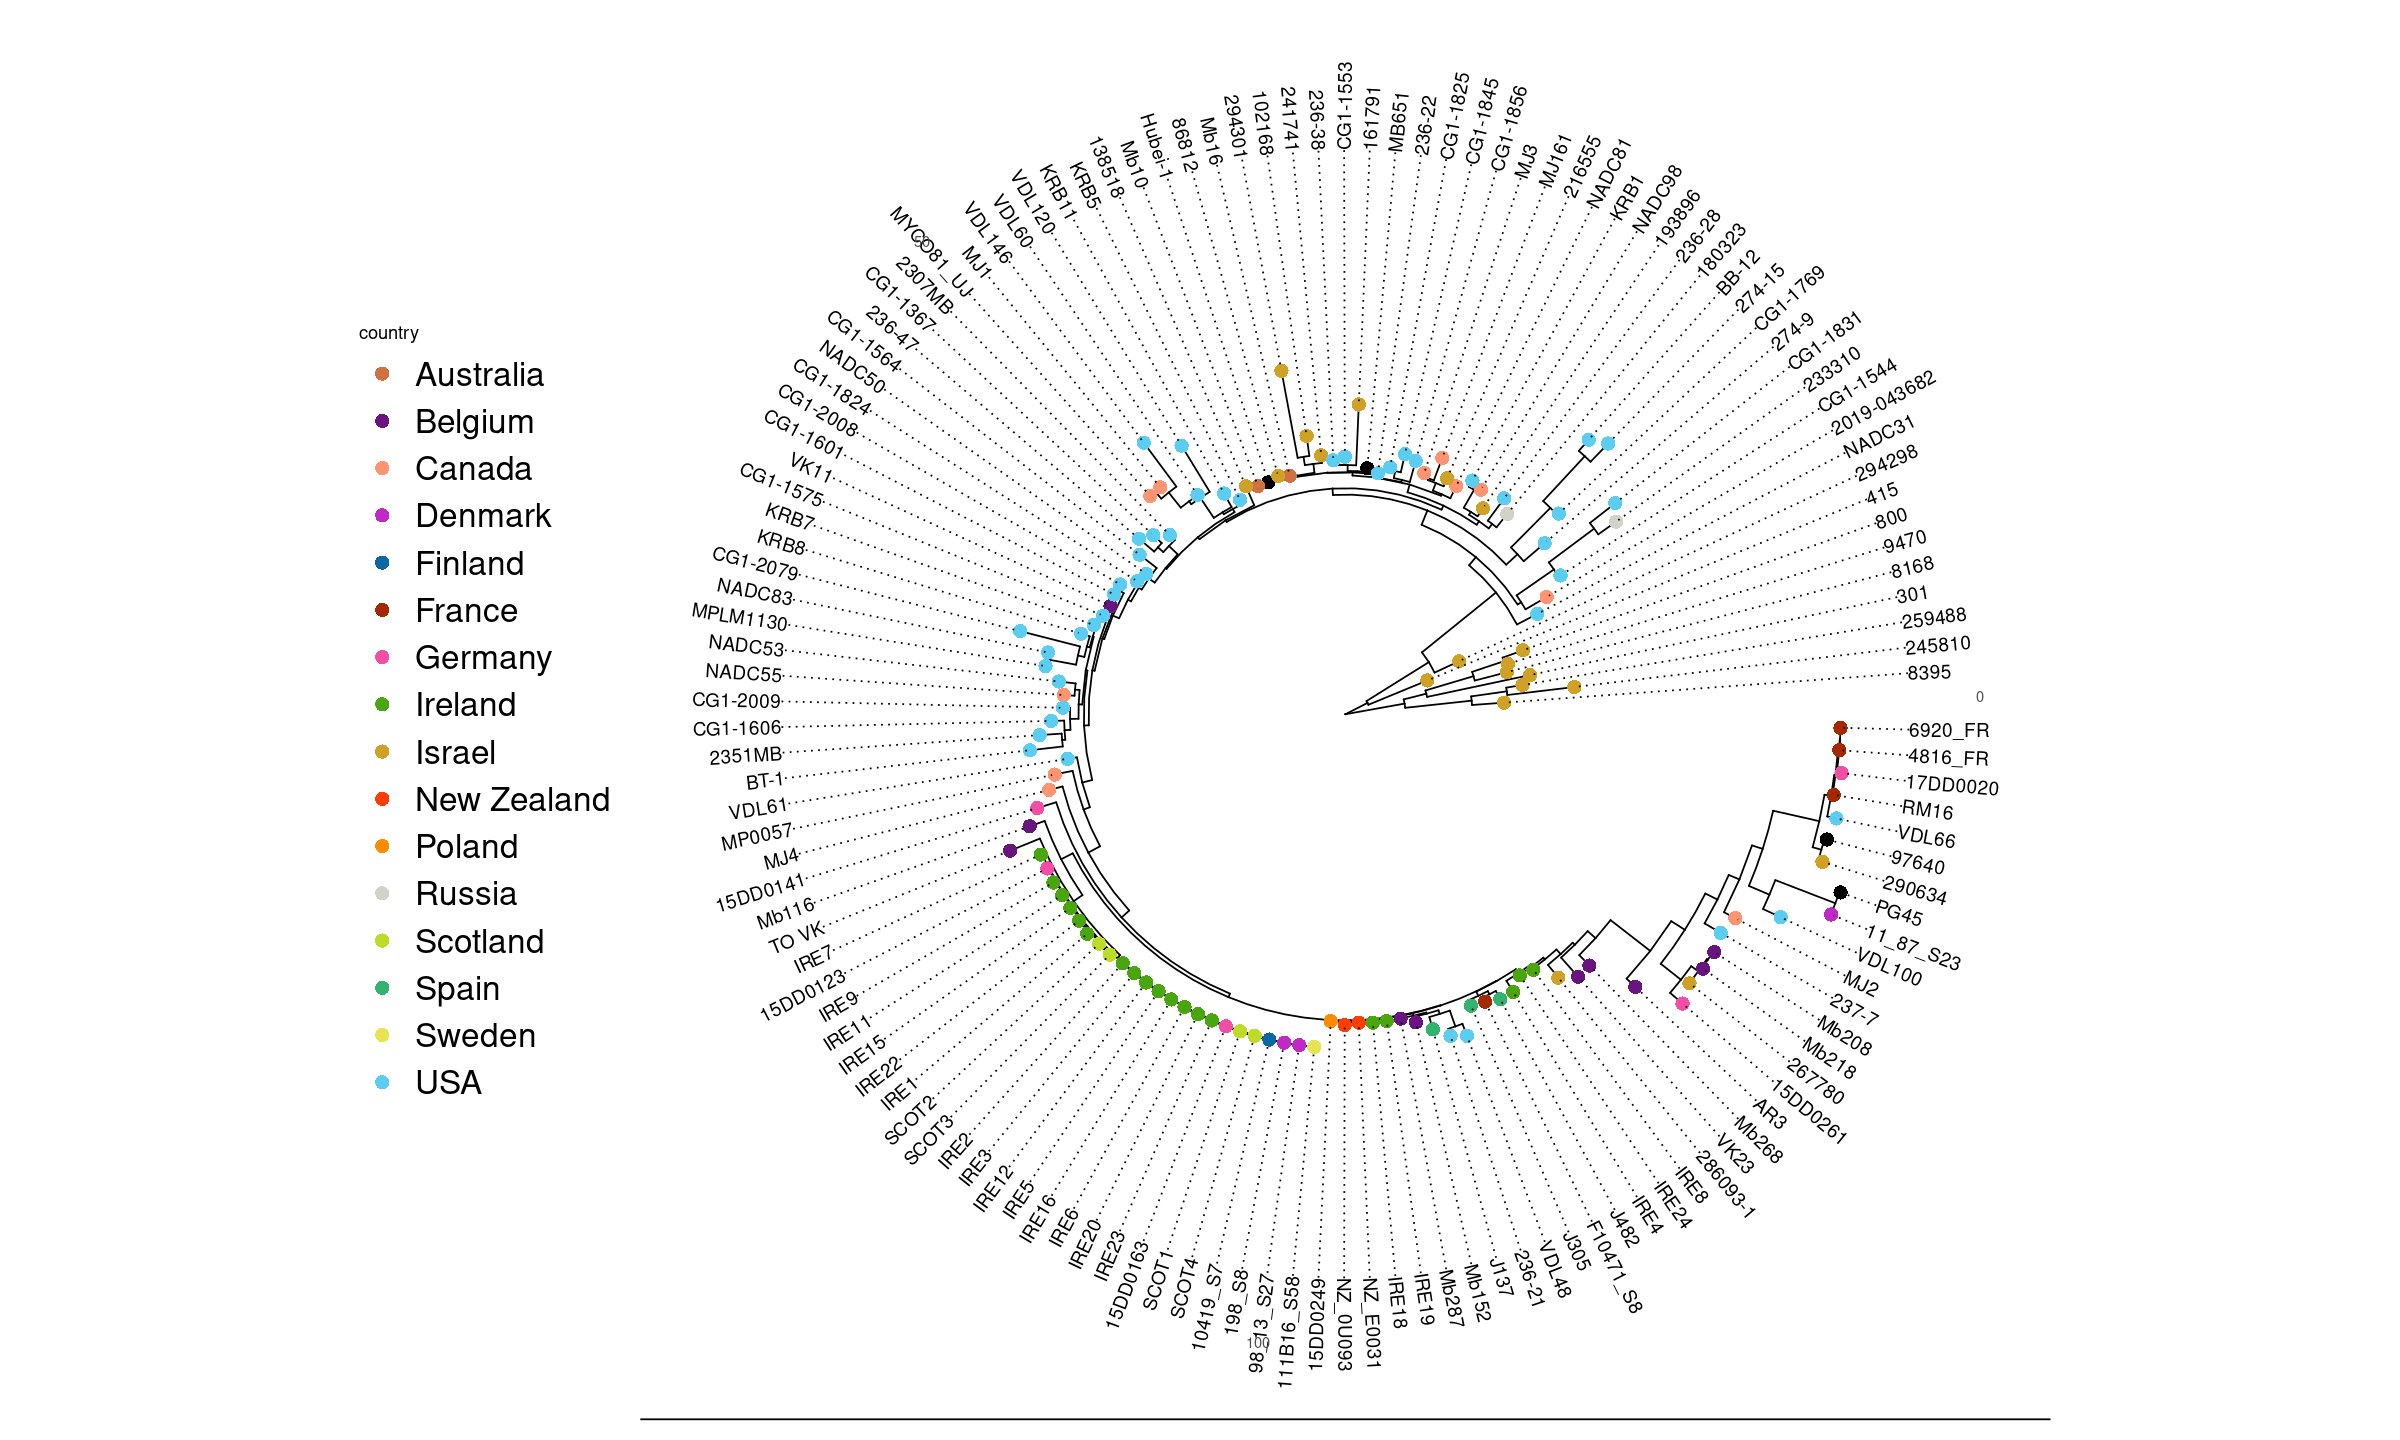

In [316]:
options(repr.plot.width=20, repr.plot.height=12)
tr<-drop.tip(ktree,'NC_009497')
p <- ggplottree(tr, gmeta, layout="c", colors=mycolors,
           cols=c('country'), cmaps=c('Set1'), tiplabel=TRUE, tiplabelcol='strain',
           tipsize=4,offset=.0001,tipoffset=.02,tiplabelsize=4, align=TRUE)
#collapse USA and israel clades
#p <- collapse(p, node=160)
#p <- collapse(p, node=204)
#p <- p + geom_text2(aes(subset=(node=120)), cex=1.5, vjust=0.2, label="Israel", hjust = -.5)
p

In [16]:
options(repr.plot.width=18, repr.plot.height=12)
tr<-extract.clade(ktree, 148)

p <- ggplottree(tr, gmeta, layout="rect", colors=mycolors, cols=c('country','ST'), cmaps=c('Set1','Paired'),
           tipsize=5,offset=.02,tiplabel=TRUE,tiplabelsize=3.5,tipoffset=.002,tiplabelcol='strain') #+ xlim(NA, .7)           
#p <- collapse(p, node=155)
#p <- viewClade(p, 150)
p <- p + 
  geom_cladelabel(getMRCA(tr,c('224','228')), "Clade 1", offset=.1, barsize=2, angle=90, offset.text=.01, hjust=0.5, fontsize=6)
p <- p + 
  geom_cladelabel(getMRCA(tr,c('245','227')), "Clade 2", offset=.1, barsize=2, angle=90, offset.text=.01, hjust=0.5, fontsize=6)
p

ERROR: Error in eval(expr, envir, enclos): object 'ktree' not found


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


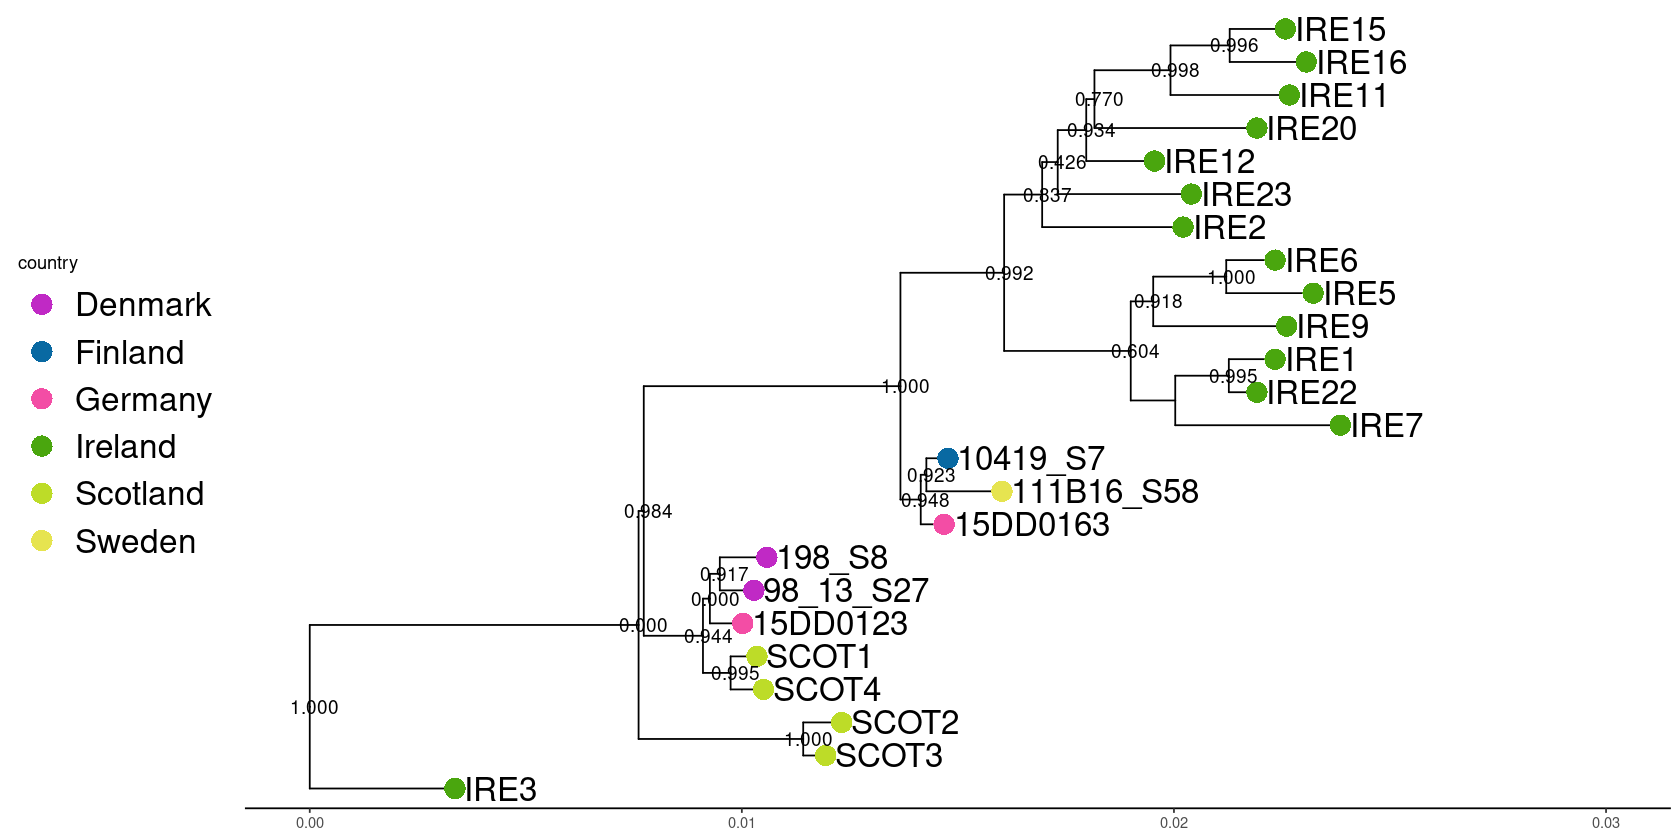

In [512]:
#clade 1
mrca <- findMRCA(ktree, c('240','224'))
tr <- extract.clade(ktree,mrca)

options(repr.plot.width=14, repr.plot.height=7)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=6, tipoffset=.0001,tiplabelsize=7,tiplabel=TRUE,tiplabelcol='strain')+ xlim(NA, .03)
p+geom_nodelab(size = 4, col= "red")

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


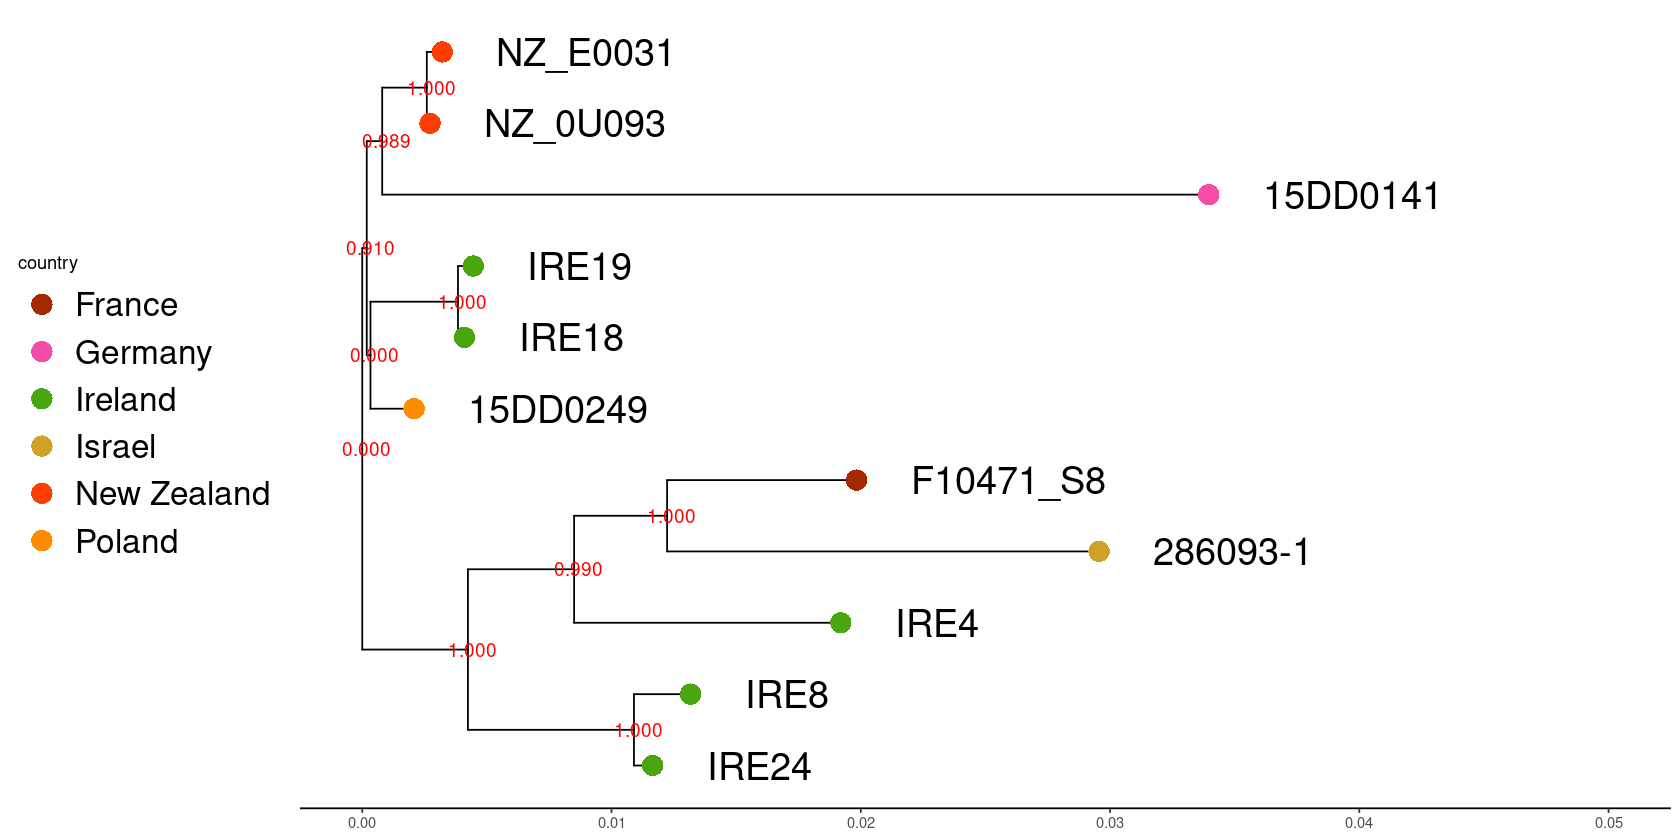

In [525]:
#clade 2
mrca <- findMRCA(ktree, c('241','245'))
tr <- extract.clade(ktree,mrca)
options(repr.plot.width=14, repr.plot.height=7)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=6, tipoffset=.002,tiplabelsize=8,tiplabel=TRUE,tiplabelcol='strain') + xlim(NA, .05)
p+geom_nodelab(size = 4, color= "red")

In [ ]:
options(repr.plot.width=20, repr.plot.height=12)
ggplottree(rtree, gmeta, layout="rect", colors=mycolors, 
           cols=c('country','vspB','vspN','vspJ','vspA','vspF','vspG','vspH','vspN','vspL','vspO','rpmB','rplS'), 
           cmaps=c('Set1','Blues'),
           tipsize=3.5,offset=.08,tiplabel=FALSE,tiplabelsize=3) #+ xlim(NA, 1.1)

## clustermap for DM

In [ ]:
#mrca <- findMRCA(rtree, c('241','SRR12673053','SRR12686385'))
#tr <- extract.clade(rtree,mrca)
tips <- c('243-B21','241','227','245','SRR12673053','SRR12686385','GB18001319')
tr <- keep.tip(tree, tips)
options(repr.plot.width=16, repr.plot.height=8)
ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), cmaps=c('Set1'),tipsize=7, tiplabel=TRUE)


In [51]:
#aln <- read.dna("ksnp_reduced/core_SNPs_matrix.fasta", format = "fasta")
aln <- read.dna("panaroo_global/core_gene_alignment_filtered.aln", format = "fasta")
s=ctree$tip.label
subaln <- aln[s,]
dm <- dist.dna(subaln)
dm[is.na(dm)] <- 0
#dm <- dm*l
#rownames(dm) = s

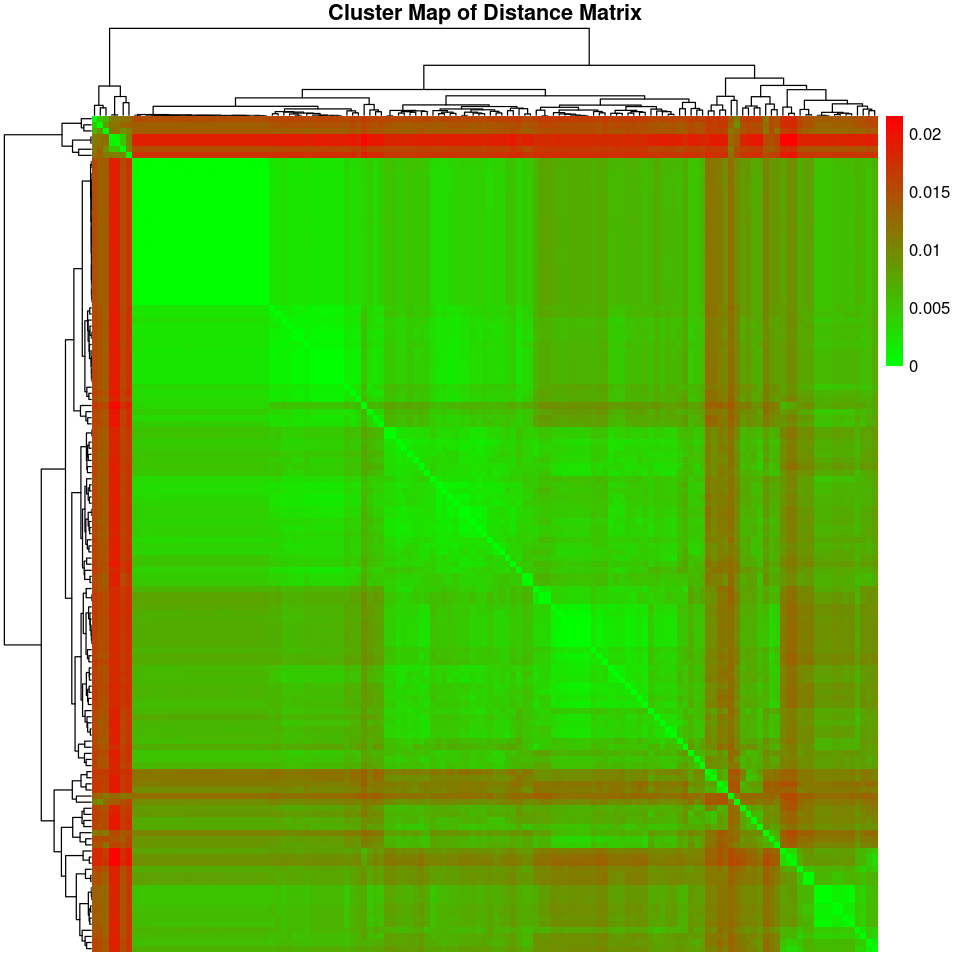

In [52]:
library(pheatmap)

# Create a hierarchical clustering object
hc_rows <- hclust(dist(dm))
hc_cols <- hclust(dist(t(dm)))

# Create a cluster map using pheatmap
options(repr.plot.width=8, repr.plot.height=8)
pheatmap(
  dm,
  cluster_rows = hc_rows,
  cluster_cols = hc_cols,
  color = colorRampPalette(c("green", "red"))(100),
  main = "Cluster Map of Distance Matrix",
  annotation_col = row.names(hc_cols),
)

## PCA

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


old_name,strain,sample_title,organism,isolate,host,isolation_source,collection_date,year,county,⋯,id,AssemblyAccession,BioSampleAccn,BioSampleId,SubmitterOrganization,geo_loc_name,region,species,ST,color
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


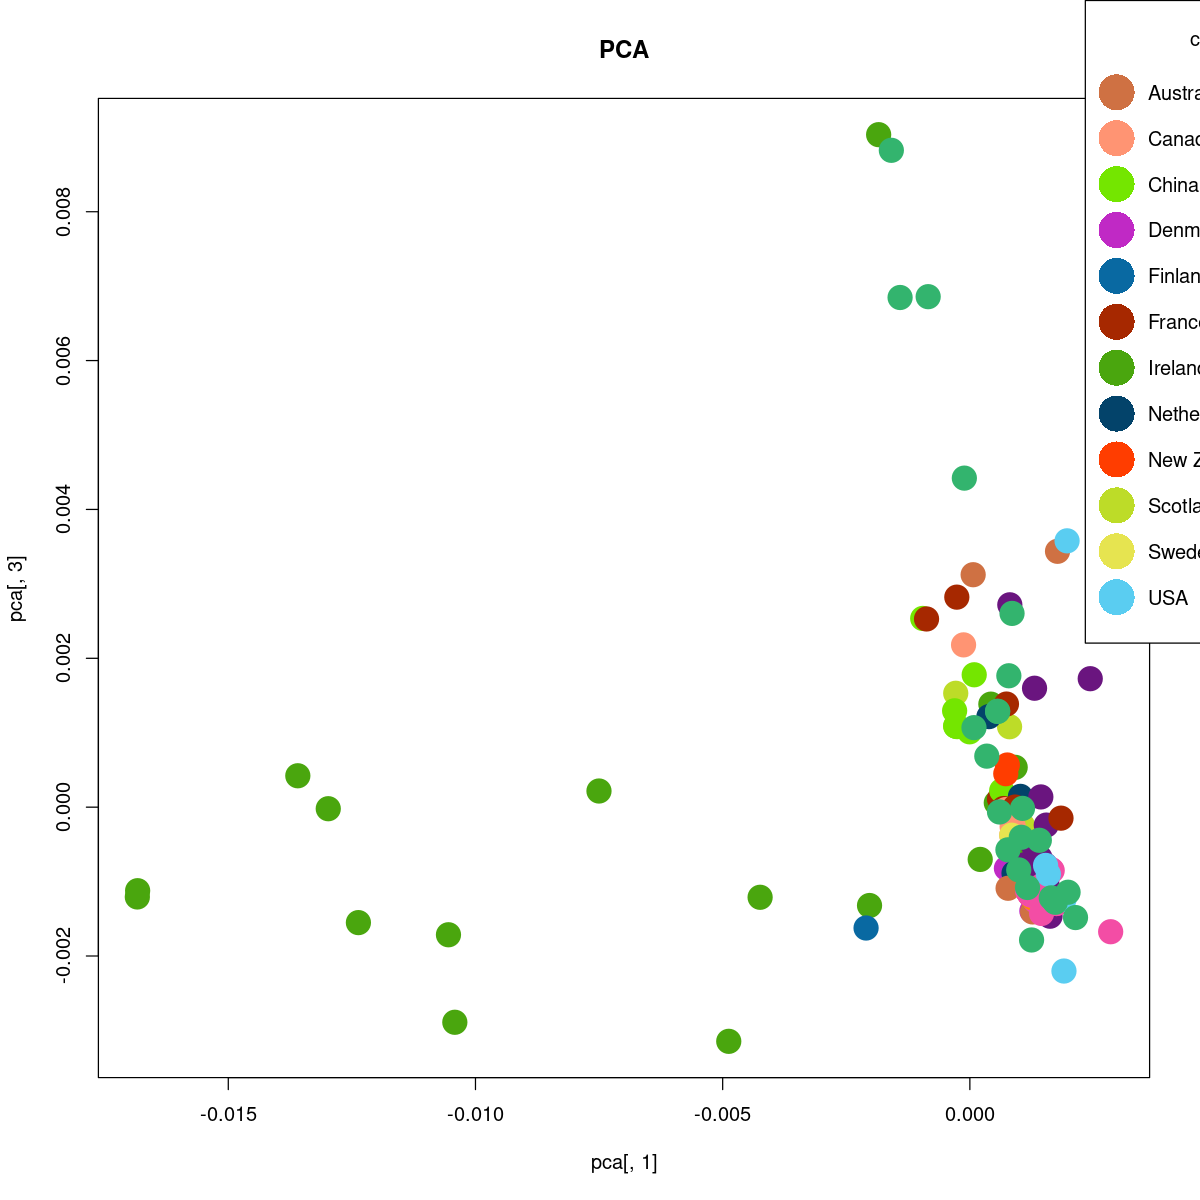

In [57]:
samples <- tr$tip.label
pca <- cmdscale(dm, k=3)
groups <- as.factor(meta$country)
df <- gmeta[row.names(dm)]

gmeta$color <- mycolors[gmeta$country]
options(repr.plot.width=10, repr.plot.height=10)
plot(pca[, 1], pca[, 3], pch=20, col = gmeta$color, main = "PCA", cex=4)
par(mar=c(8, 0, 4, 8.1), xpd=TRUE)
legend("topright", inset=c(-0.2,-.1), legend=levels(groups), 
       col=mycolors[levels(groups)], cex=1, pt.cex = 4,pch=16, title = "country")